Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Akshaj Kammari"
COLLABORATORS = "You.com"

---

### DO NOT post this lab on public or commercial sites. The lab is intended only for students taking CS439 in Fall 2023

---

<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself. We will NOT grade this submissing w/o all the information<br>
<b>Name</b>: Akshaj Kammari<br>
<b>NetID</b>: ak1990<br>
<b>Recitation (01,02,03,04)</b>: 02<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: ak     


<h3>Grader Notes</h3> See codepost

</div>

## CS 439 - Introduction to Data Science
### Fall 2023

# Lab 3: Exploratary Data Analysis

### Due Date: Sunday October 22, 2023 by 11:59 PM ###
### 60 points ####

### Instructions
This lab is presented as a notebook. Please execute the cells that are already completed and your task is to fill in the code. 

#### Important: Please do not add any new cells or change the order of cells. If you have questions, please contact the course staff. To unlock a cell, click on upperright and change the metadata of editable to true.

In this lab, you will be working with a dataset from NYPD containing data on calls to the New York Police Department. Information about the datasets can be found at https://opendata.cityofnewyork.us/

## Setup

Note that after activating matplotlib to display figures inline via the IPython magic `%matplotlib inline`, we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)

Defaulting to user installation because normal site-packages is not writeable


# Part 1 : Getting Data (10 pts)

We will work with the NYPD Historic complaint data set. Our first task is to estimate the size of this download by looking at the number of rows, columns and using an estimated size for a column (use a reasonable value). The site metadata is available from the page
https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

### START SOLUTION
estimated size of the download (based on metadata information from the site without download) = 2.42 GB      
# please explain how you reached the answer
#10 number columns of 32 bits each
#3 datetime columns of 64 bits each
#1 location column of 128 bits
#21 text columns of 80 bits
#everything summed up is ~2320 bits * 8.353 million rows ~ 2.42 GB
### END_OF SOLUTION

### 1.1 Download the data
This file is large (use the estimate you did above). If it takes too long to download, you may want to interrupt and download the file using a browser and URL https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

In [3]:
import utils
data_dir = 'data'
data_url = 'https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i'

file_name = '/home/ak1990/cs439/Lab 03 - Exploratory Data Analysis/data/NYPD_Complaint_Data_Historic.csv'

# To retrieve the dataset, we will use the `utils.fetch_and_cache` utility from utils library. 
dest_path = utils.fetch_and_cache(data_url=data_url, file=file_name,data_dir=data_dir)
print(f'Located at {dest_path}')

Using version already downloaded: Wed Oct 25 20:26:36 2023
MD5 hash of file: d2705fc0e34d8afc1753d0231b865303
Located at /home/ak1990/cs439/Lab 03 - Exploratory Data Analysis/data/NYPD_Complaint_Data_Historic.csv


### 1.2 Inspect the size of the file
It is helpful to get an idea of the size of the file. This can be done using functions in the utils library.

In [4]:
# look at the size of the file w/o opening it using OS (https://docs.python.org/3/library/os.html). You can perform
# variety of operating system related functions from this package.
import os
### START SOLUTION

size = os.stat(file_name)
print(size.st_size)

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

258252182


### 1.3 Split the large file
This data file NYPD_Complaint_Data_Historic.csv is too big to load into a single DataFrame. Let us split the large file into smaller files.  Let us find out the number of lines in the NYPD_Complaint_Data_Historic.csv file using utils.

In [5]:
# Using utils library, find the number of lines in the file
import utils
### START SOLUTION

numlines = utils.line_count(file_name)
print(numlines)


### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

737600


In [6]:
# Split the file into 10 smaller files. Estimate the number of lines in each file using the count above
# files should be created in the data folder and named NYPD_Complaint_Data_Historic_1.csv, 
# NYPD_Complaint_Data_Historic_2.csv, ... NYPD_Complaint_Data_Historic_10.csv etc
# It is possible that few lines from the original file may not be saved due to rounding errors.
import pandas as pd
### START SOLUTION

chunksize = int(np.ceil(float(numlines)/10))

i = 0
for chunk in pd.read_csv(file_name, chunksize = chunksize):
    chunk.to_csv(f'data/NYPD_Complaint_Data_Historic_{i + 1}.csv')
    i += 1


### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

### 1.4 Check the files in the data folder
Now, we'll use a method of the `Pathlib.Path` class called `glob` to list all files in the `data` directory. You will find useful information in pathlib [docs](https://docs.python.org/3/library/pathlib.html).

Below, we use pathlib's `glob` method to store the list of all files' names from the `data_dir` directory in the variable `file_names`. These names should be strings that contain only the file name (e.g. `dummy.txt` not `data/dummy.txt`). The asterisk (*) character is used with the `glob` method to match any string.

In [7]:
from pathlib import Path
data_dir_path = Path('data') # creates a Path object that points to the data directory
file_names = [x.name for x in data_dir_path.glob('*') if x.is_file()]
file_names

['NYPD_Complaint_Data_Historic_1.csv',
 'NYPD_Complaint_Data_Historic_6.csv',
 'NYPD_Complaint_Data_Historic_8.csv',
 'NYPD_Complaint_Data_Historic_9.csv',
 'NYPD_Complaint_Data_Historic_7.csv',
 'NYPD_Complaint_Data_Historic_3.csv',
 'NYPD_Complaint_Data_Historic_4.csv',
 'NYPD_Complaint_Data_Historic.csv',
 'NYPD_Complaint_Data_Historic_5.csv',
 'NYPD_Complaint_Data_Historic_2.csv',
 'NYPD_Complaint_Data_Historic_10.csv']

### 1.5 Pre-processing of data
It is good to pre-process the data to see if the file can be opened in a Jupyter notebook. We need to avoid large files that can crash notebooks. Typically, files of size around 200 MB is ok to open into a DataFrame. In the following activities we will inspect the file w/o opening it as a DataFrame. Using utils.head 

In [8]:
# Use the util.head() to read up to 5 lines from the original file (w/o opening it)
from utils import head
head('data/NYPD_Complaint_Data_Historic_1.csv')

[',Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX\n',
 '0,0,394506329,12/31/2019,17:30:00,,,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,,STREET,N.Y. POLICE DEPT,0.0,,,,999937.0,238365.0,,,,,40.82092679700002,-73.94332421899996,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,,UNKNOWN,UNKNOWN,E\n',
 '1,1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,,STREET,N.Y. POLICE DEPT,0.0,,,,1022508.0,261990.0,,,,,40.88570140600008,-73.86164032499995,"(40.885701406000074, -73.8616403249999

### 1.6 Inspecting and describing data columns
There should be 35 columns in each record. Using header information and data types, describe the type of data in each
column. If you are unable to determine, just state so. Write the answer below in the markdown cell.

##### 
* CMPLNT_NUM: Randomly generated persistent ID for each complaint, Plain Text
* CMPLNT_FR_DT: Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists), Date & Time
* CMPLNT_FR_TM: Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists), Plain Text
* CMPLNT_TO_DT: Ending date of occurrence for the reported event, if exact time of occurrence is unknown, Date & Time
* CMPLNT_TO_TM: Ending time of occurrence for the reported event, if exact time of occurrence is unknown, Plain Text
* ADDR_PCT_CD: The precinct in which the incident occurred, Number
* RPT_DT: Date event was reported to police, Date & Time
* KY_CD: Three digit offense classification code, Number
* OFNS_DESC: Description of offense corresponding with key code, Plain Text
* PD_CD: Three digit internal classification code (more granular than Key Code), Number
* PD_DESC: Description of internal classification corresponding with PD code (more granular than Offense Description), Plain Text
* CRM_ATPT_CPTD_CD: Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely, Plain Text
* LAW_CAT_CD: Level of offense: felony, misdemeanor, violation, Plain Text
* BORO_NM: The name of the borough in which the incident occurred, Plain Text
* LOC_OF_OCCUR_DESC: Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of, Plain Text
* PREM_TYP_DESC: Specific description of premises; grocery store, residence, street, etc., Plain Text
* JURIS_DESC: Description of the jurisdiction code, Plain Text
* JURISDICTION_CODE: Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc., Number
* PARKS_NM: Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included), Plain Text
* HADEVELOPT: Name of NYCHA housing development of occurrence, if applicable, Plain Text
* HOUSING_PSA: Development Level Code, Plain Text
* X_COORD_CD: X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104), Number
* Y_COORD_CD: Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104), Number
* SUSP_AGE_GROUP: Suspect’s Age Group, Plain Text
* SUSP_RACE: Suspect’s Race Description, Plain Text
* SUSP_SEX: Suspect’s Sex Description, Plain Text
* TRANSIT_DISTRICT: Transit district in which the offense occurred., Number
* Latitude: Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326), Number
* Longitude: Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326), Number
* Lat_Lon: Geospatial Location Point (latitude and Longitude combined), Location
* PATROL_BORO: The name of the patrol borough in which the incident occurred, Plain Text
* STATION_NAME: Transit station name, Plain Text
* VIC_AGE_GROUP: Victim’s Age Group, Plain Text
* VIC_RACE: Victim’s Race Description, Plain Text
* VIC_SEX: Victim’s Sex Description, Plain Text
##### 

# Part 2 - Exploratory Data Analysis  (20 points)
Exploratory data analysis (EDA) is the process of examining a subest of a large data set to see what we can know about the data. First we will explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 2.1 Time to load data into a DataFrame
Load the first CSV file, NYPD_Complaint_Data_Historic_1.csv into a `pandas.DataFrame` object. Also do a time analysis to see how long it took to load the data into a DataFrame. Time should be printed in seconds. The time libraries https://docs.python.org/3/library/time.html can help.

In [9]:
!pip install --user memory_profiler

In [10]:
### START SOLUTION

import pandas as pd
import time

start = time.time()
calls = pd.read_csv("data/NYPD_Complaint_Data_Historic_1.csv")
end = time.time()
elapsed = end-start

calls.head()
print(elapsed)


### END_OF SOLUTION
#source: you.com

0.4572021961212158


### 2.2 Description of Fields
Let's also check some basic information about these files using the `DataFrame.describe` and `DataFrame.info` methods. Describe columns that can be removed based on the information.

In [11]:
### START SOLUTION

calls.describe()
calls.info()

### END_OF SOLUTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73760 entries, 0 to 73759
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       73760 non-null  int64  
 1   Unnamed: 0         73760 non-null  int64  
 2   CMPLNT_NUM         73760 non-null  int64  
 3   CMPLNT_FR_DT       73760 non-null  object 
 4   CMPLNT_FR_TM       73760 non-null  object 
 5   CMPLNT_TO_DT       64739 non-null  object 
 6   CMPLNT_TO_TM       64783 non-null  object 
 7   ADDR_PCT_CD        73752 non-null  float64
 8   RPT_DT             73760 non-null  object 
 9   KY_CD              73760 non-null  int64  
 10  OFNS_DESC          73756 non-null  object 
 11  PD_CD              73634 non-null  float64
 12  PD_DESC            73634 non-null  object 
 13  CRM_ATPT_CPTD_CD   73760 non-null  object 
 14  LAW_CAT_CD         73760 non-null  object 
 15  BORO_NM            73630 non-null  object 
 16  LOC_OF_OCCUR_DESC  614

**Question** What columns/features can be removed from the DataFrame? A rule of thumb is that if a column is missing more than 
50% of the data then it should be removed


The columns PARKS_NM, HADEVELOPT, HOUSING_PSA, TRANSIT_DISTRICT, STATION_NAME all have more than 50% of the data missing and can be removed

### 2.2 Finding Uniques and more..

Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further.

find the number of unique values in each DataFrame column and write code to print the answers to questions below.

In [12]:
### START SOLUTION

calls.nunique()

# 1. How many distinct locations where the complaints have come from? 
    #5
# 2. How many age groups are represented in the data set? 
    #8
# 3. How many boroughs are included in the data set? 
    #5
# 4. How many offense types are listed in this data set? 
    #56

### END_OF SOLUTION

Unnamed: 0.1         73760
Unnamed: 0           73760
CMPLNT_NUM           73760
CMPLNT_FR_DT           805
CMPLNT_FR_TM          1438
CMPLNT_TO_DT           516
CMPLNT_TO_TM          1440
ADDR_PCT_CD             77
RPT_DT                 447
KY_CD                   60
OFNS_DESC               56
PD_CD                  296
PD_DESC                287
CRM_ATPT_CPTD_CD         2
LAW_CAT_CD               3
BORO_NM                  5
LOC_OF_OCCUR_DESC        5
PREM_TYP_DESC           74
JURIS_DESC              19
JURISDICTION_CODE       19
PARKS_NM               144
HADEVELOPT             236
HOUSING_PSA            293
X_COORD_CD           24861
Y_COORD_CD           26263
SUSP_AGE_GROUP           8
SUSP_RACE                7
SUSP_SEX                 3
TRANSIT_DISTRICT        12
Latitude             30207
Longitude            30208
Lat_Lon              30210
PATROL_BORO              8
STATION_NAME           302
VIC_AGE_GROUP           12
VIC_RACE                 7
VIC_SEX                  4
d

### 2.3 Offense by Boro
Using GroupBy operation, create a DataFrame that groups offenses by Boro. call the DataFrame **calls_by_Boro_and_offense**

In [13]:
# YOUR CODE HERE

calls_by_Boro_and_offense = calls.groupby(['BORO_NM','OFNS_DESC']).size()
calls_by_Boro_and_offense

#raise NotImplementedError()
#source: you.com

BORO_NM        OFNS_DESC                           
BRONX          ADMINISTRATIVE CODE                       61
               AGRICULTURE & MRKTS LAW-UNCLASSIFIED       2
               ALCOHOLIC BEVERAGE CONTROL LAW             2
               ARSON                                     32
               ASSAULT 3 & RELATED OFFENSES            2232
                                                       ... 
STATEN ISLAND  ROBBERY                                   38
               SEX CRIMES                                35
               THEFT-FRAUD                               40
               UNAUTHORIZED USE OF A VEHICLE             14
               VEHICLE AND TRAFFIC LAWS                  24
Length: 215, dtype: int64

### 2.4 Offenses in Bronx

In the cell below, find a list of strings corresponding to the possible values for `OFNS_DESC` when `BORO` is "BRONX". Create an expression that automatically extracts the names of the offenses.

In [14]:
# YOUR CODE HERE

print(list(calls_by_Boro_and_offense['BRONX'].index))

#raise NotImplementedError()

['ADMINISTRATIVE CODE', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'ARSON', 'ASSAULT 3 & RELATED OFFENSES', "BURGLAR'S TOOLS", 'BURGLARY', 'CHILD ABANDONMENT/NON SUPPORT', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'ENDAN WELFARE INCOMP', 'ESCAPE 3', 'FELONY ASSAULT', 'FORGERY', 'FRAUDS', 'FRAUDULENT ACCOSTING', 'GAMBLING', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'KIDNAPPING & RELATED OFFENSES', 'LOITERING/GAMBLING (CARDS, DIC', 'MISCELLANEOUS PENAL LAW', 'NYS LAWS-UNCLASSIFIED FELONY', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST PUBLIC SAFETY', 'OFFENSES AGAINST THE PERSON', 'OFFENSES INVOLVING FRAUD', 'OFFENSES RELATED TO CHILDREN', 'OTHER OFFENSES RELATED TO THEF', 'OTHER STATE LAWS (NON PENAL LA', 'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'PROSTITUTION & RELATED OFFENSES', 'RAPE', 'ROBBERY',

##### Question
What is the analysis period of data? and How many offenses were committed in Bronx during the analysis period? Write the answer below.



11/02/2016 - 06/16/2023. 45 offenses.

### 2.5 Most Common Crimes in NYC

What are the five crime types of OFNS_DESC that have the most crime events in Bronx? You may need to use `value_counts` to find the answer. Save your results as a list of strings.

**Hint:** *The `keys` method of the Series class might be useful.*

In [15]:
# YOUR CODE HERE

print(list(calls[calls['BORO_NM'] == 'BRONX']['OFNS_DESC'].value_counts().head(5).keys()))

#raise NotImplementedError()
#source: you.com

['HARRASSMENT 2', 'PETIT LARCENY', 'ASSAULT 3 & RELATED OFFENSES', 'CRIMINAL MISCHIEF & RELATED OF', 'GRAND LARCENY']


### 2.6 Probability of a Crime in Bronx
What is the probability that a the crime "Arson" can happen in Bronx on a monday?

In [16]:
### START SOLUTION

arson = calls_by_Boro_and_offense['BRONX']['ARSON']
bronx = sum(list(calls_by_Boro_and_offense['BRONX']))
print(arson/bronx)

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation
#source: you.com

0.001962588163140141


---
# Part 3: Visualizing the Data (25 pts)

## Pandas vs. Seaborn Plotting

Pandas offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method. However, the basic plots generated by pandas are not particularly pretty. While it's possible to manually use matplotlib commands to make pandas plots look better, we'll instead use a high level plotting library called Seaborn that will take care of most of this for us.

As you learn to do data visualization, you may find the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) and [Seaborn documentation](https://seaborn.pydata.org/api.html) helpful!

We will continue use EDA for examining a subest of a large data set to see what we can know about the data. Continue to explore one file NYPD_Complaint_Data_Historic_1.csv to see what we can find out.

### 3.1 Plotting a Series
Using the built-in plotting functionality of pandas, such as `plot` method of the `Series` class to generate a `barh` plot type,  display the value counts for `OFNS_DESC` visually as a barh chart.

Text(0.5, 1.0, 'Number of Calls by Offense Type')

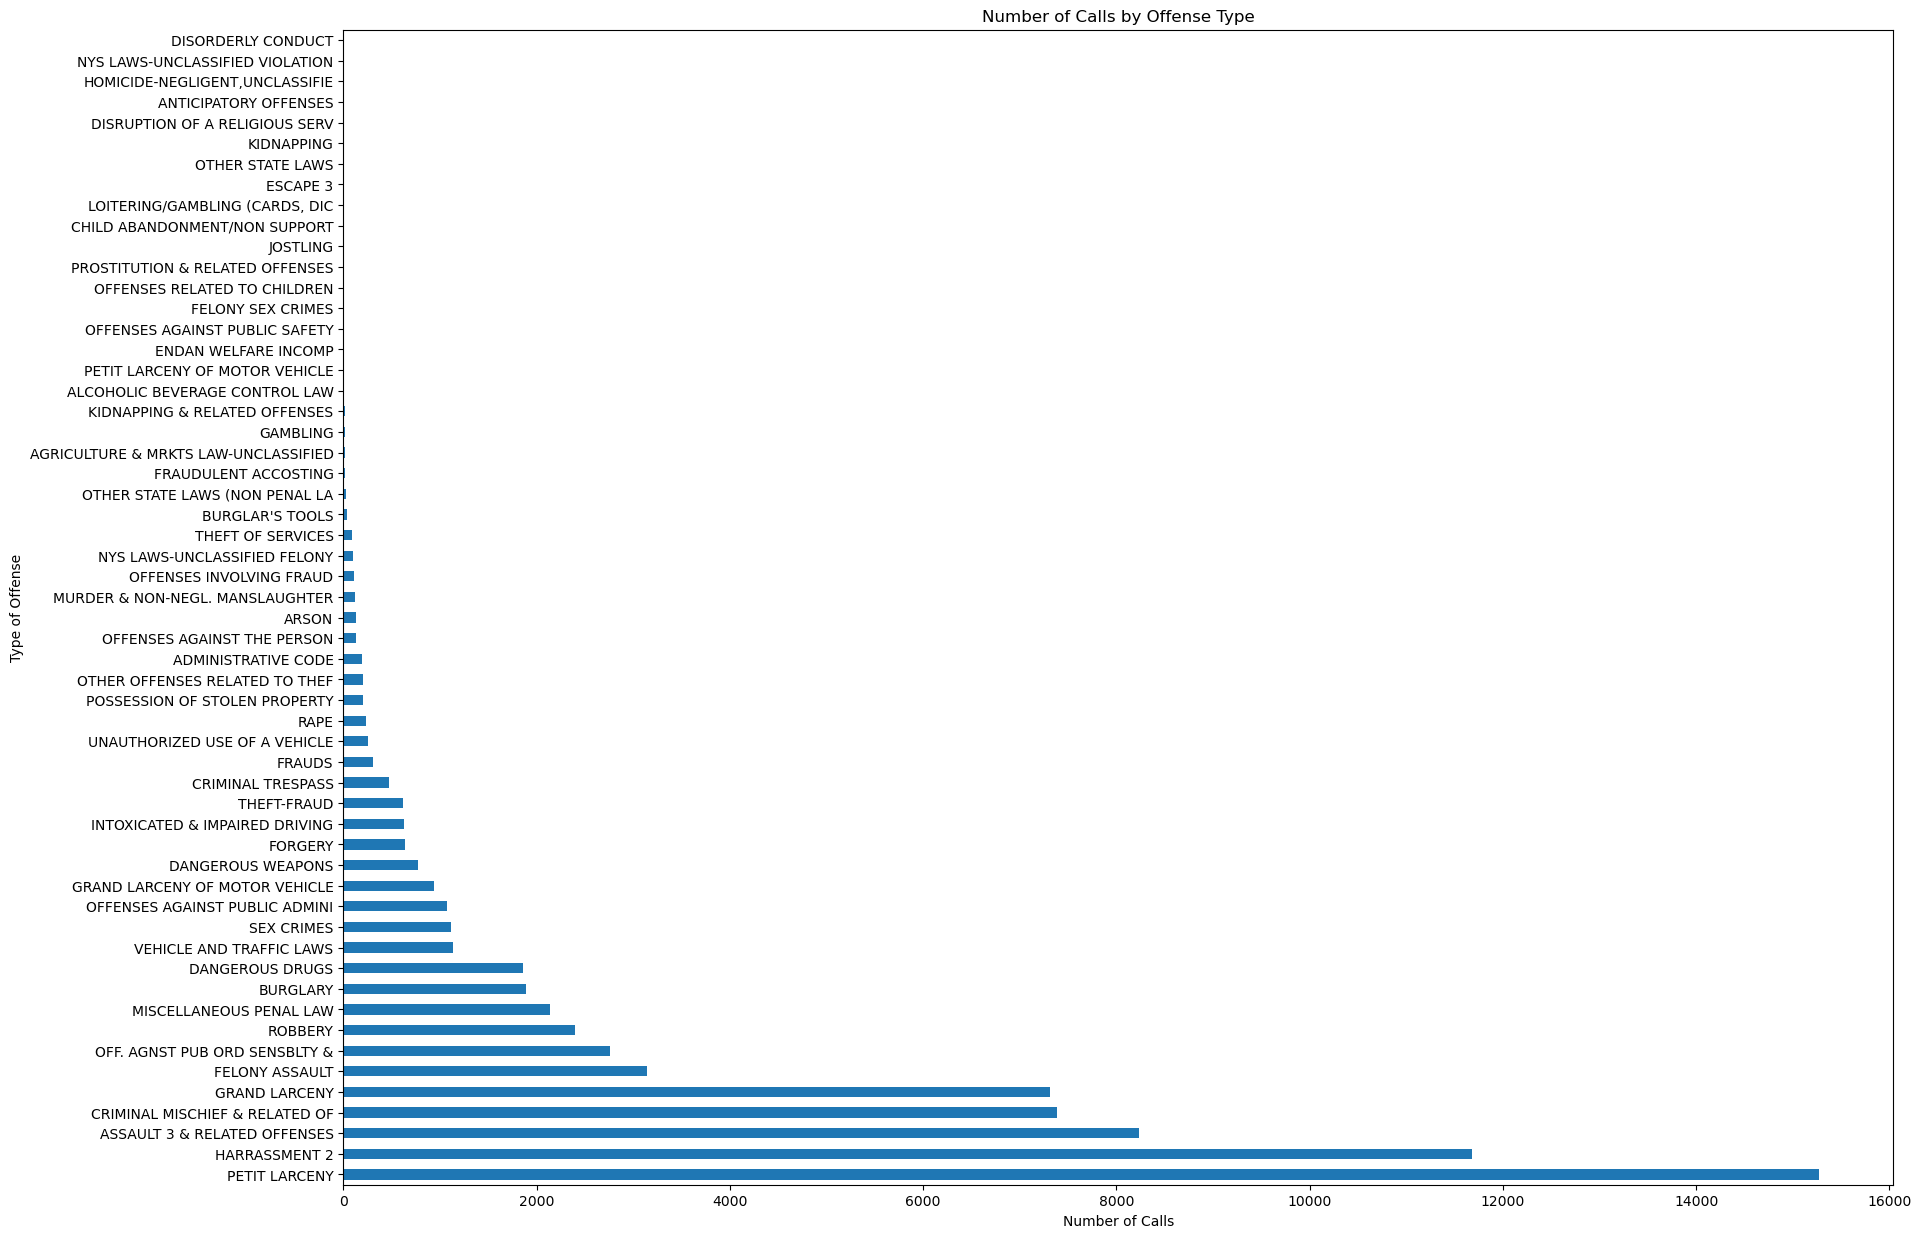

In [17]:
### START SOLUTION

display = calls['OFNS_DESC'].value_counts().plot(kind = 'barh')

display.set_xlabel('Number of Calls')
display.set_ylabel('Type of Offense')
display.set_title('Number of Calls by Offense Type')

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation
#source: you.com

### 3.2 Getting a Better Plot
The plot above can be messy as it plots all offenses. Plot only the offenses that has **more than 10000 calls**

Text(0.5, 1.0, 'Number of Calls by Offense Type')

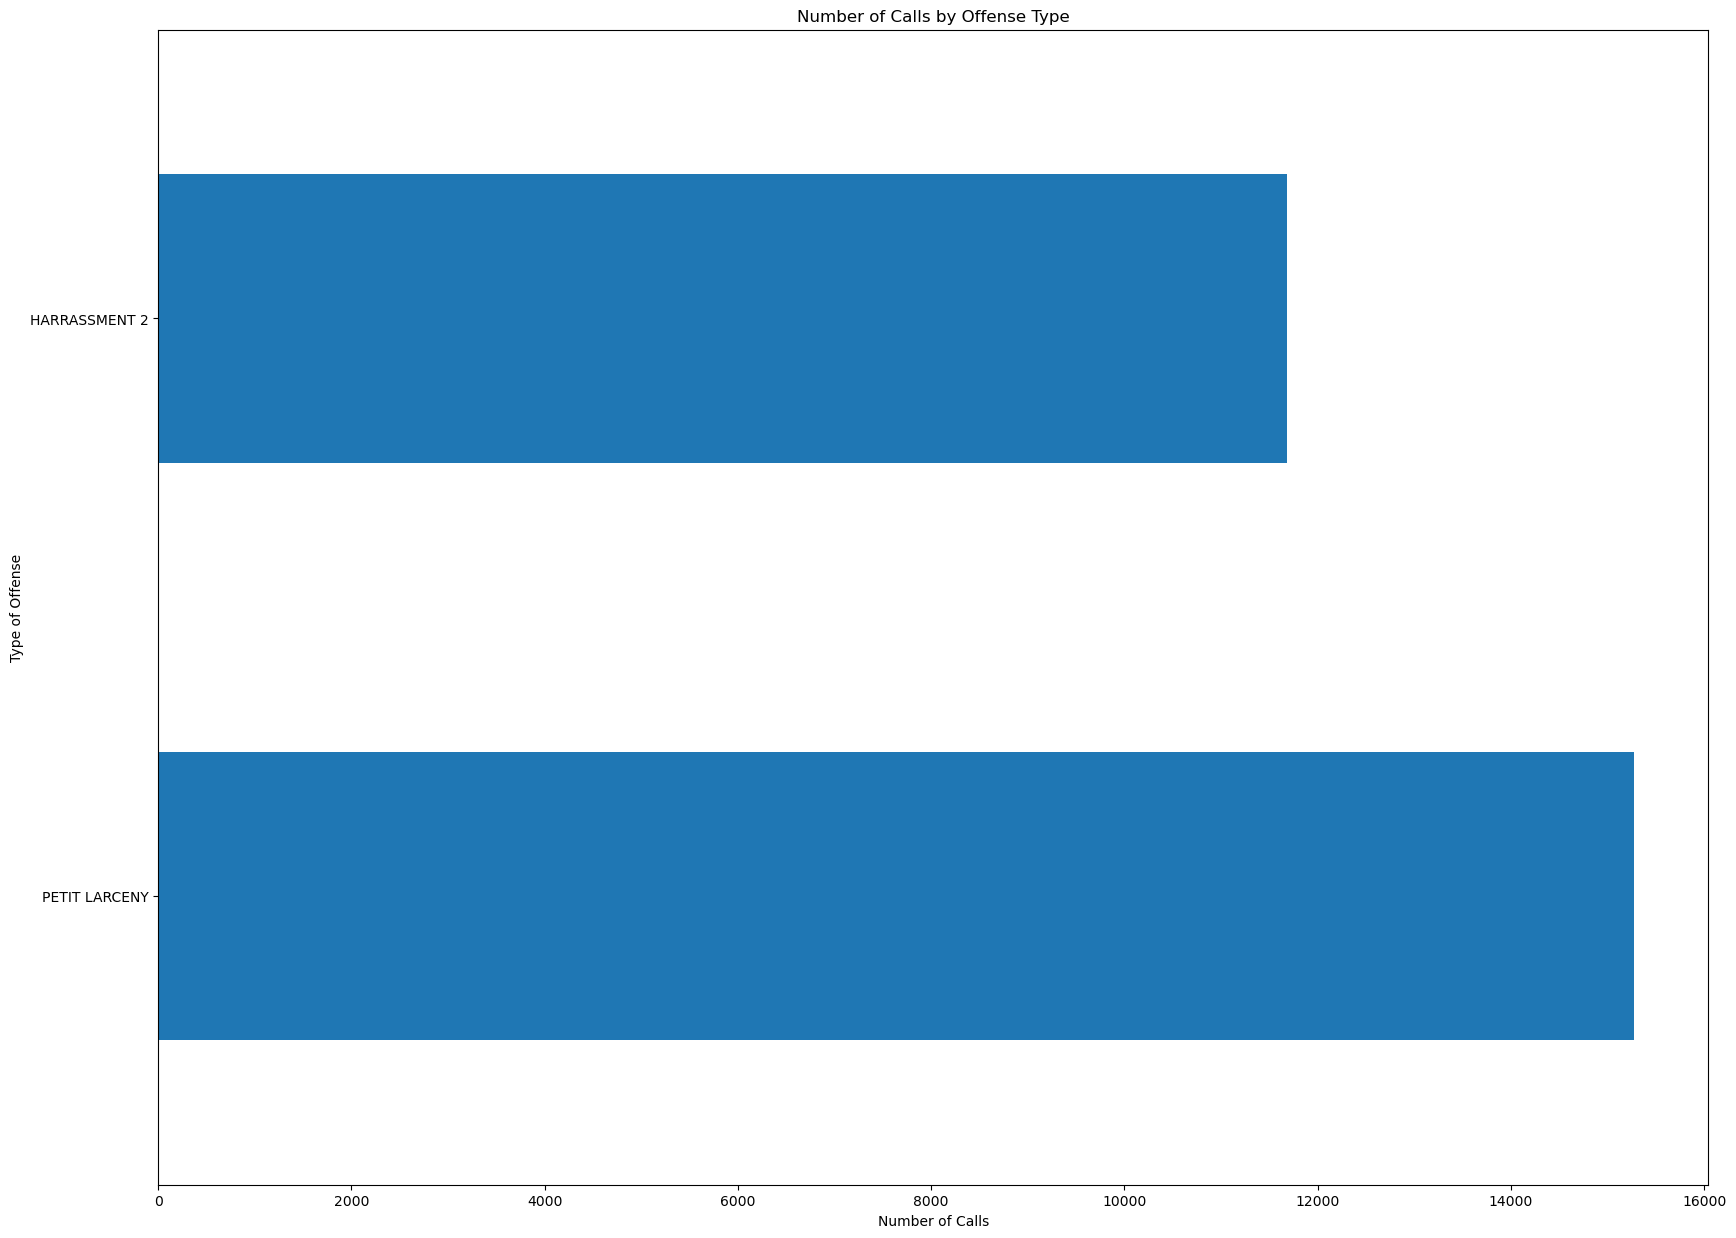

In [18]:
### START SOLUTION

clean = calls['OFNS_DESC'].value_counts()
clean = clean[clean>10000]

display = clean.plot(kind='barh')

display.set_xlabel('Number of Calls')
display.set_ylabel('Type of Offense')
display.set_title('Number of Calls by Offense Type')

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation
#source: you.com

By contrast, the Seaborn library provides a specific function `countplot` built for plotting counts. It operates directly on the DataFrame itself i.e. there's no need to call `value_counts()` at all. This higher level approach makes it easier to work with. Use the y-label ("Crime Category"), x-label("Number of Calls") and title_of_plot("Number of Calls By Crime Type"

Text(0.5, 1.0, 'Number of Calls By Crime Type')

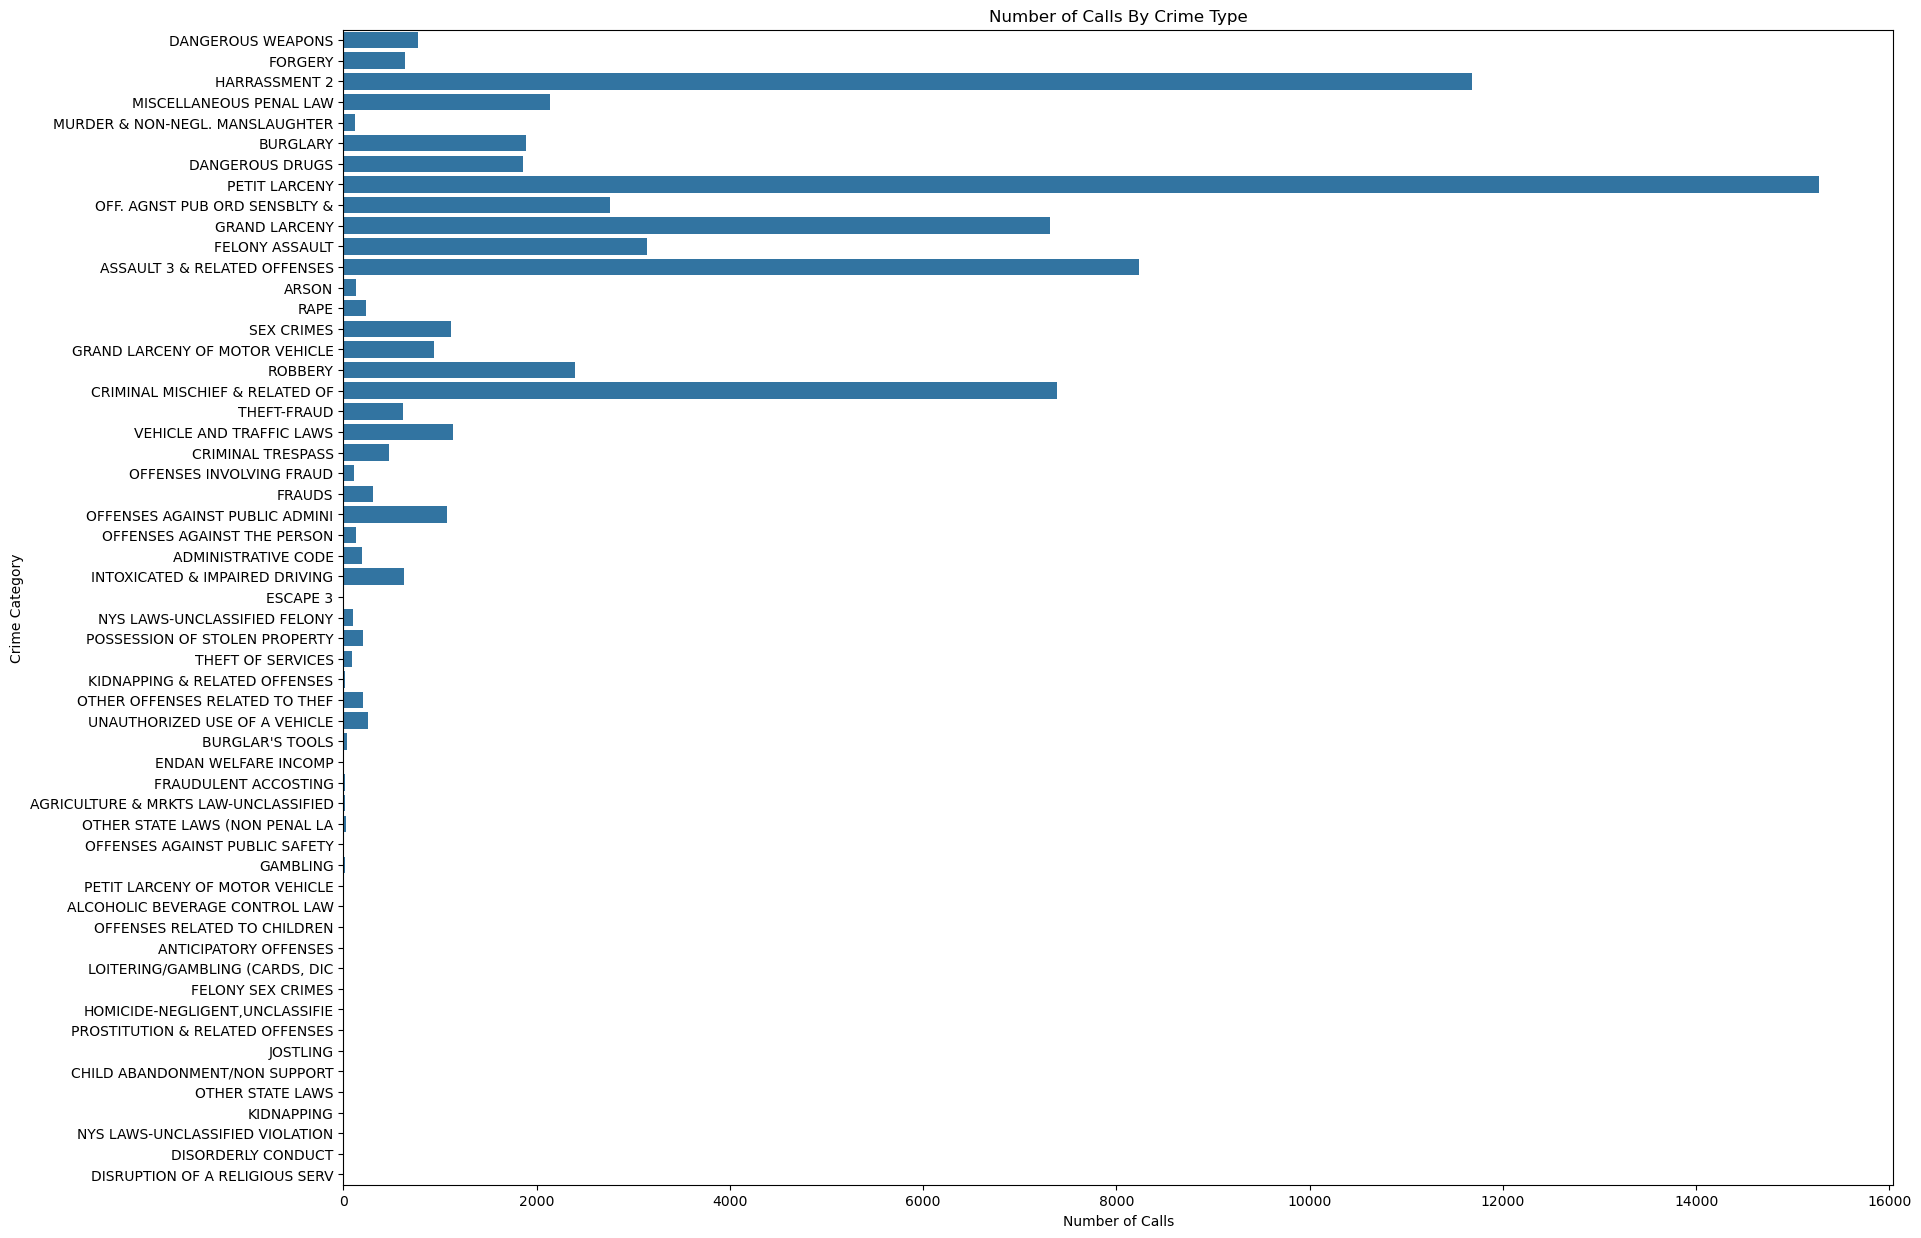

In [19]:
### START SOLUTION

display = sns.countplot(data=calls,y='OFNS_DESC')

display.set_xlabel('Number of Calls')
display.set_ylabel('Crime Category')
display.set_title('Number of Calls By Crime Type')

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

You may note that the ordering might be different for the seaborn plot (as compared to pandas plot). If we want the same ordering that we had in the pandas plot, we can use the order parameter of the `countplot` method. It takes a list of strings corresponding to the axis to be ordered. By passing the index of the `value_counts`, you can get the order you want.

Text(0.5, 1.0, 'Number of Calls By Crime Type')

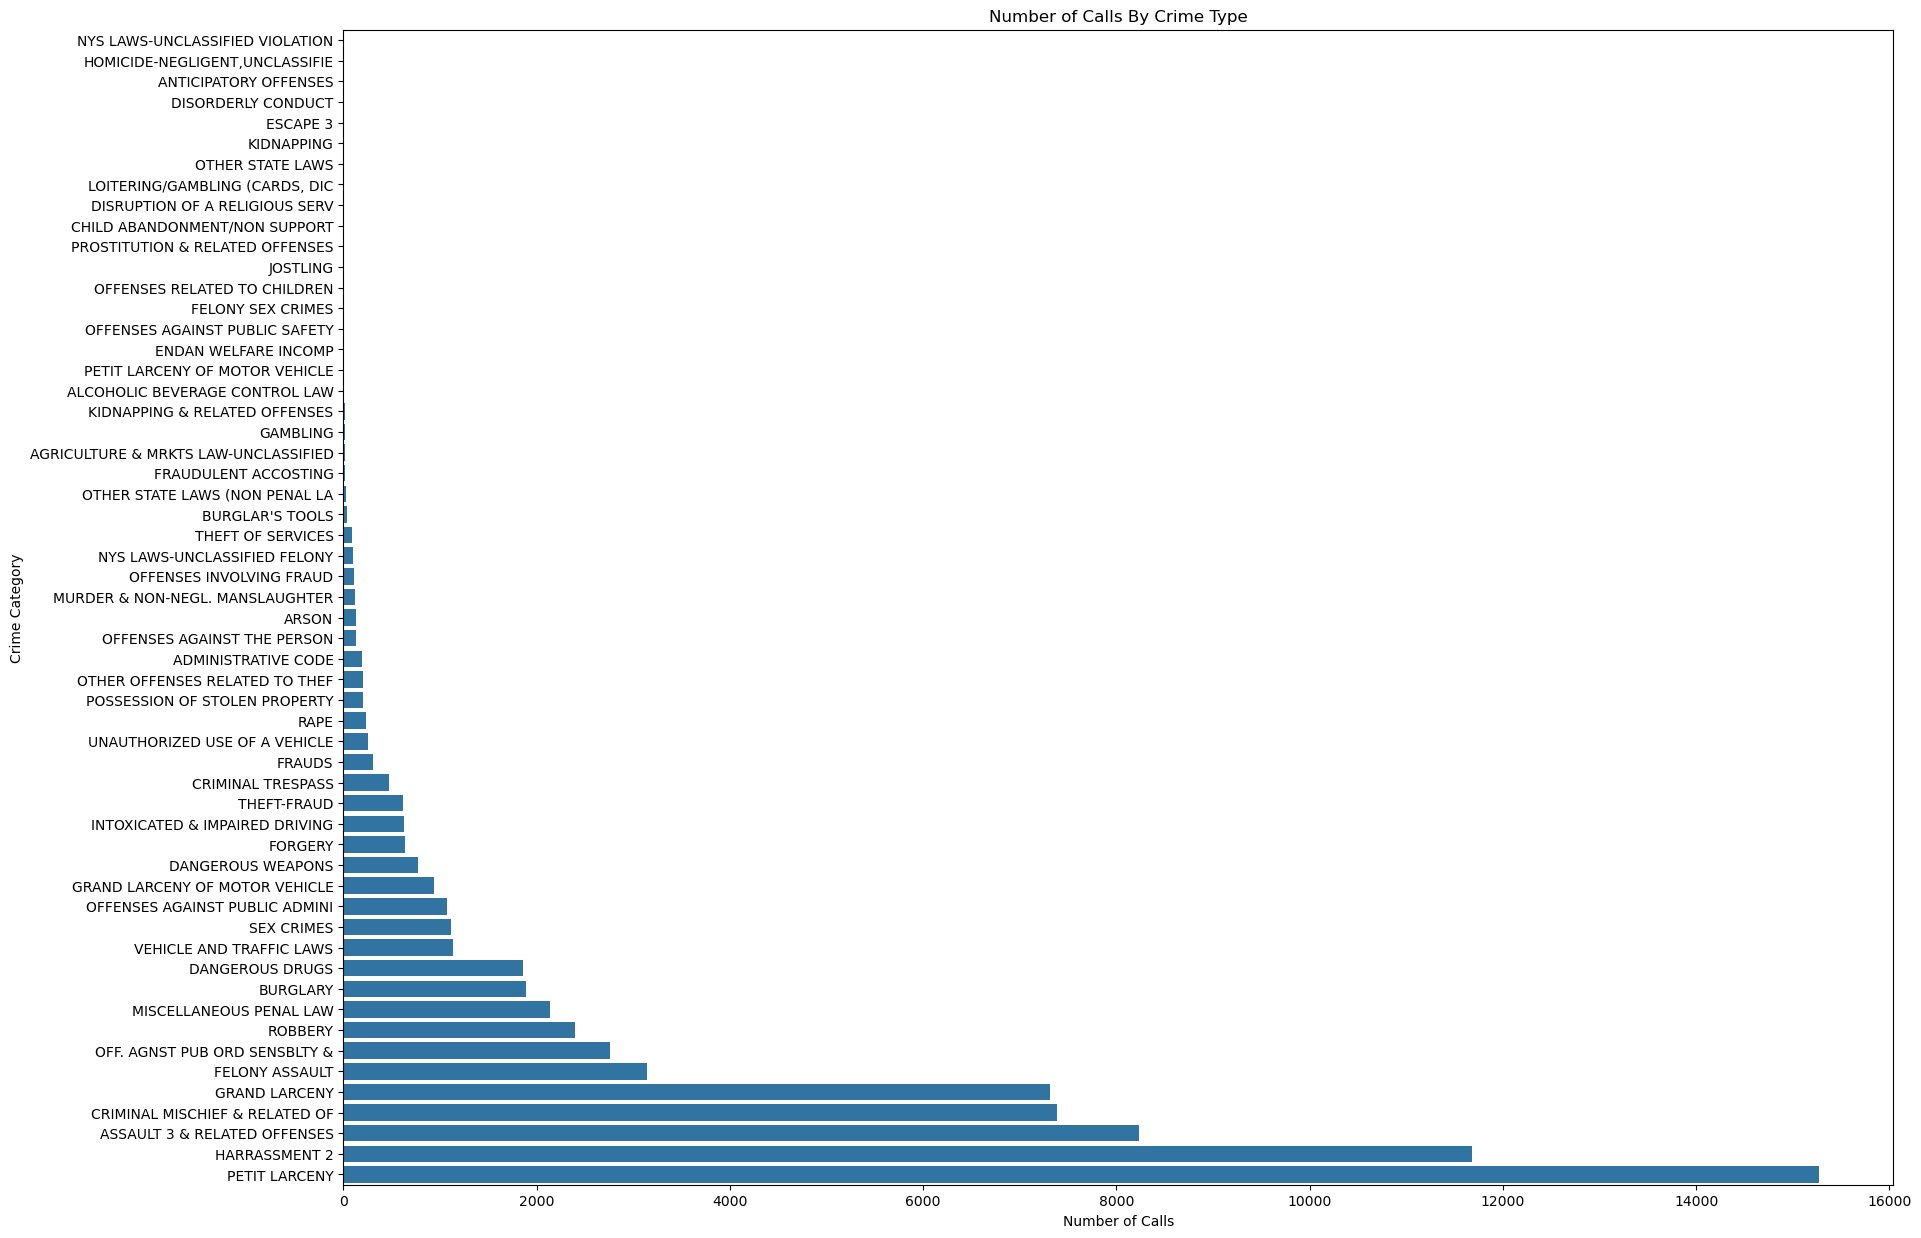

In [20]:
### START SOLUTION

display = sns.countplot(data=calls,y='OFNS_DESC',order=calls['OFNS_DESC'].value_counts(ascending=True).index)

display.set_xlabel('Number of Calls')
display.set_ylabel('Crime Category')
display.set_title('Number of Calls By Crime Type')

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

Now we have a pretty bar plot with the bars ordered by size. Though `seaborn` appears to provide a superior plot from a aesthetic point of view, the `pandas` plotting library is also good to understand. You'll get practice using both libraries in the following questions.

## An Additional Note on Plotting in Jupyter Notebooks

Code cells involving plotting end with a semicolon (;). This prevents any extra output from the last line of the cell that we may not want to see. Try adding this to your own code in the following questions!

### 3.3 making more plots

Now let's make some more plots using `pandas` and `seaborn`. Let's start by looking at the distribution of calls over days of the week.

The CMPLNT_FR_DT field contains the date of the event. We would like to add a new column to the DataFrame that includes Day of the week (DAY_OF_WEEK) that indicates the day of the week. This can help us analyze the crimes on a specific day of the week. For example, we can answer questions such as "what day of the week that a LARSON is likely to happen in NYC?"


Add a new column `DAY_OF_WEEK` into the `calls` dataframe that has the day string (eg. 'Sunday') for the corresponding value in CMPLNT_FR_DT. For example, if the first 3 values of `CMPLNT_FR_DT` are `['01/27/2006, '01/28/2006, '01/29/2006]`, then the first 3 values of the `DAY_OF_WEEK` column should be `["Friday", "Saturday", "Sunday"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) function on `calls["OFNS_DESC"]`.  Can you assign this to the new column `calls["DAY_OF_WEEK"]`?*

In [21]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
# YOUR CODE HERE

import datetime

week = []
for i in range(calls.shape[0]):
    day = calls.loc[i,'CMPLNT_FR_DT']
    m, d, y = (int(x) for x in day.split('/'))
    week.append(datetime.date(y,m,d).weekday())

calls['weekday'] = week
daynum = range(7)
indices_to_days_dict = dict(zip(daynum, days))
calls["DAY_OF_WEEK"] = calls["weekday"].map(indices_to_days_dict)
calls = calls.drop(['weekday'], axis = 1)
calls.head(50)

#raise NotImplementedError()


,Unnamed: 0.1,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,DAY_OF_WEEK
0,0,0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,...,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E,Monday
1,1,1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,...,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,Saturday
2,2,2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,...,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F,Saturday
3,3,3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,...,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E,Friday
4,4,4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,...,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M,Thursday
5,5,5,293718737,12/27/2019,22:00:00,NaN,NaN,9.0,12/27/2019,107,...,NaN,40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,M,Thursday
6,6,6,552685226,12/27/2019,20:10:00,12/27/2019,20:15:00,79.0,12/27/2019,117,...,NaN,40.695958,-73.937632,"(40.695958362000056, -73.93763162199998)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,E,Thursday
7,7,7,134037758,12/26/2019,20:00:00,12/27/2019,07:15:00,101.0,12/27/2019,341,...,NaN,40.611570,-73.747365,"(40.61157006600007, -73.74736517199995)",PATROL BORO QUEENS SOUTH,NaN,25-44,WHITE HISPANIC,F,Wednesday
8,8,8,855385879,12/26/2019,19:57:00,NaN,NaN,44.0,12/26/2019,361,...,NaN,40.840234,-73.917684,"(40.84023413800003, -73.91768411399994)",PATROL BORO BRONX,NaN,18-24,BLACK,F,Wednesday
9,9,9,241602326,12/25/2019,23:00:00,12/26/2019,14:25:00,20.0,12/26/2019,341,...,NaN,40.772875,-73.989542,"(40.77287456000005, -73.98954212299998)",PATROL BORO MAN NORTH,NaN,45-64,BLACK,M,Tuesday


### 3.4 Seaborn plots

Create a `seaborn` plot that shows the number of calls for each day of the week. You may want to use of the `rotation` argument in `ax.set_xticklabels`, which rotates the labels by 90 degrees.

Text(0.5, 1.0, 'Number of Calls for Each Day of  Week')

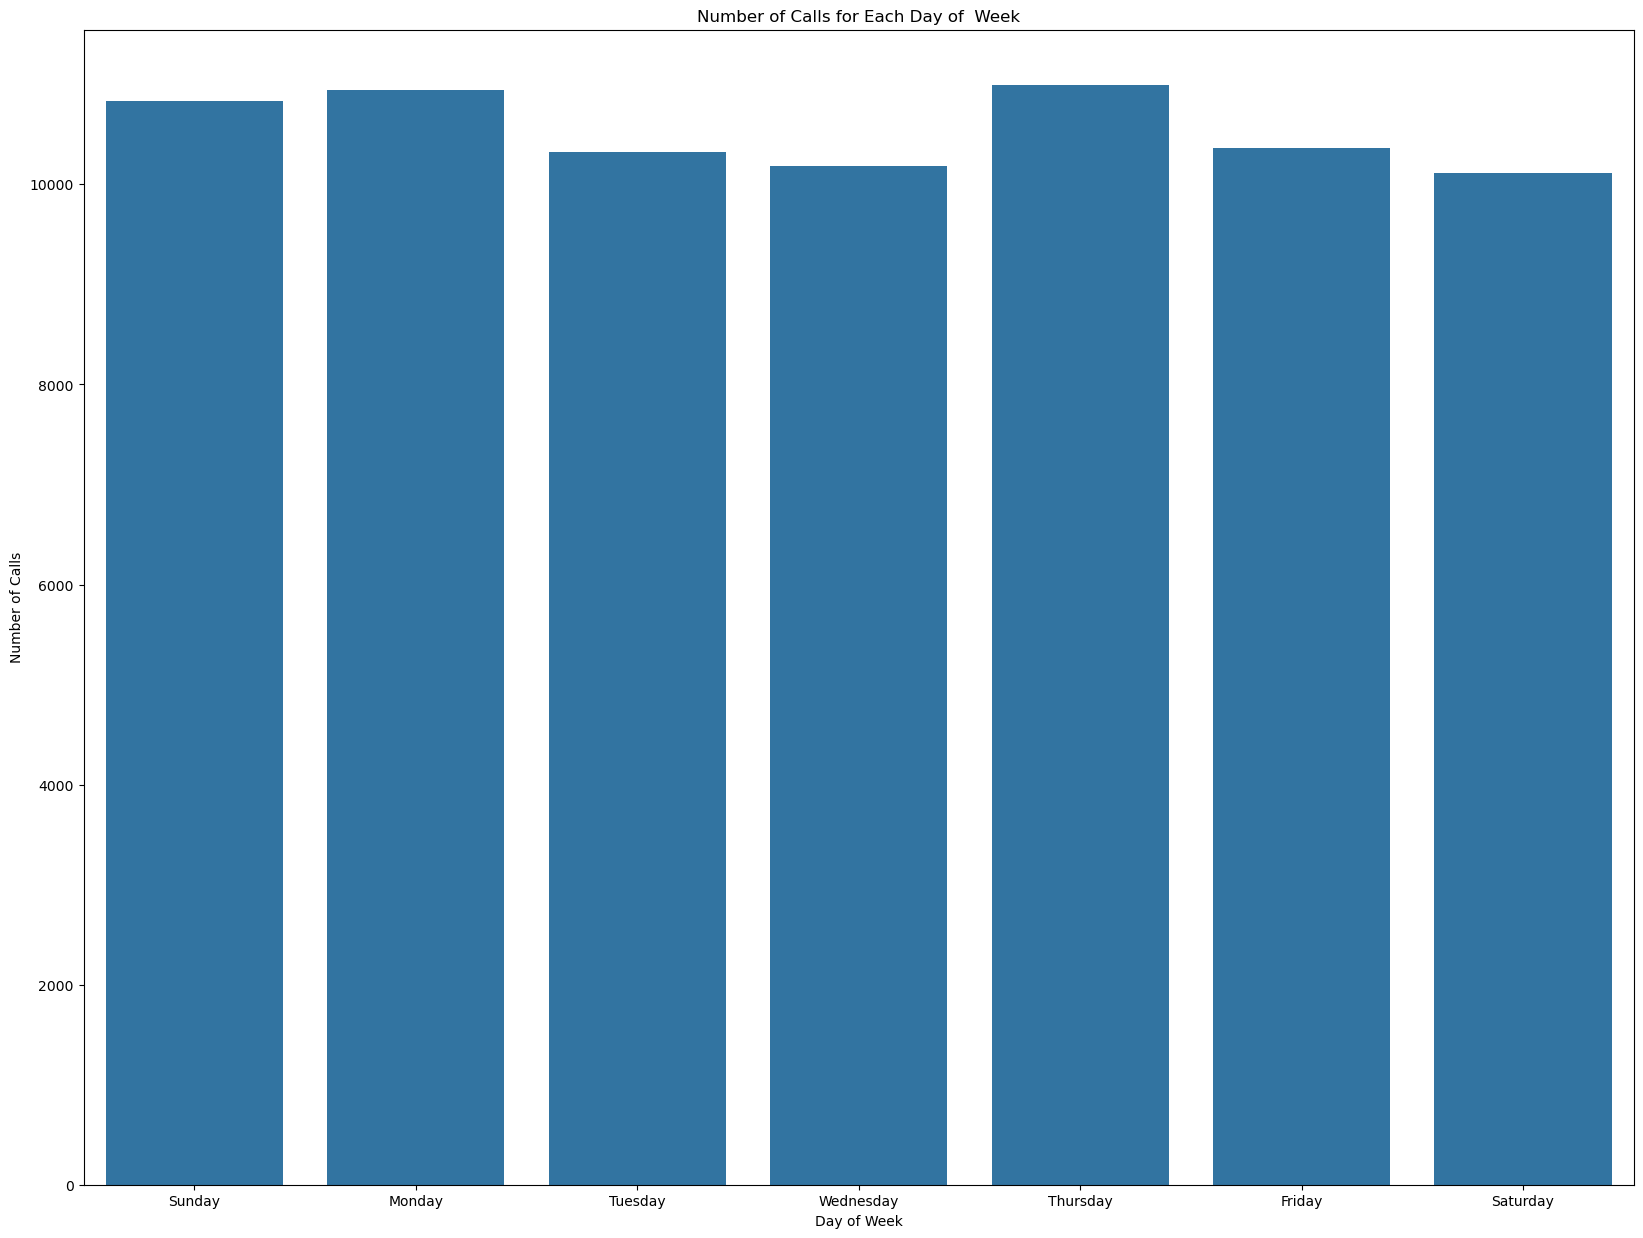

In [22]:
### START SOLUTION

display = sns.countplot(data = calls,x = 'DAY_OF_WEEK', order = days)

display.set_ylabel('Number of Calls')
display.set_xlabel('Day of Week')
display.set_title('Number of Calls for Each Day of  Week')

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

Now, let's make the same plot using `pandas`. Construct a vertical bar plot with the count of the number of calls (entries in the table) for each day of the week **ordered by the day of the week** (eg. `Sunday`, `Monday`, ...). Do not use `sns` for this plot. Be sure that your axes are labeled and that your plot is titled.

**Hint:** *Given a series `s`, and an array `coolIndex` that has the same entries as in `s.index`, `s[coolIndex]` will return a copy of the series in the same order as `coolIndex`.*

Text(0.5, 1.0, 'Number of Calls for Each Day of Week')

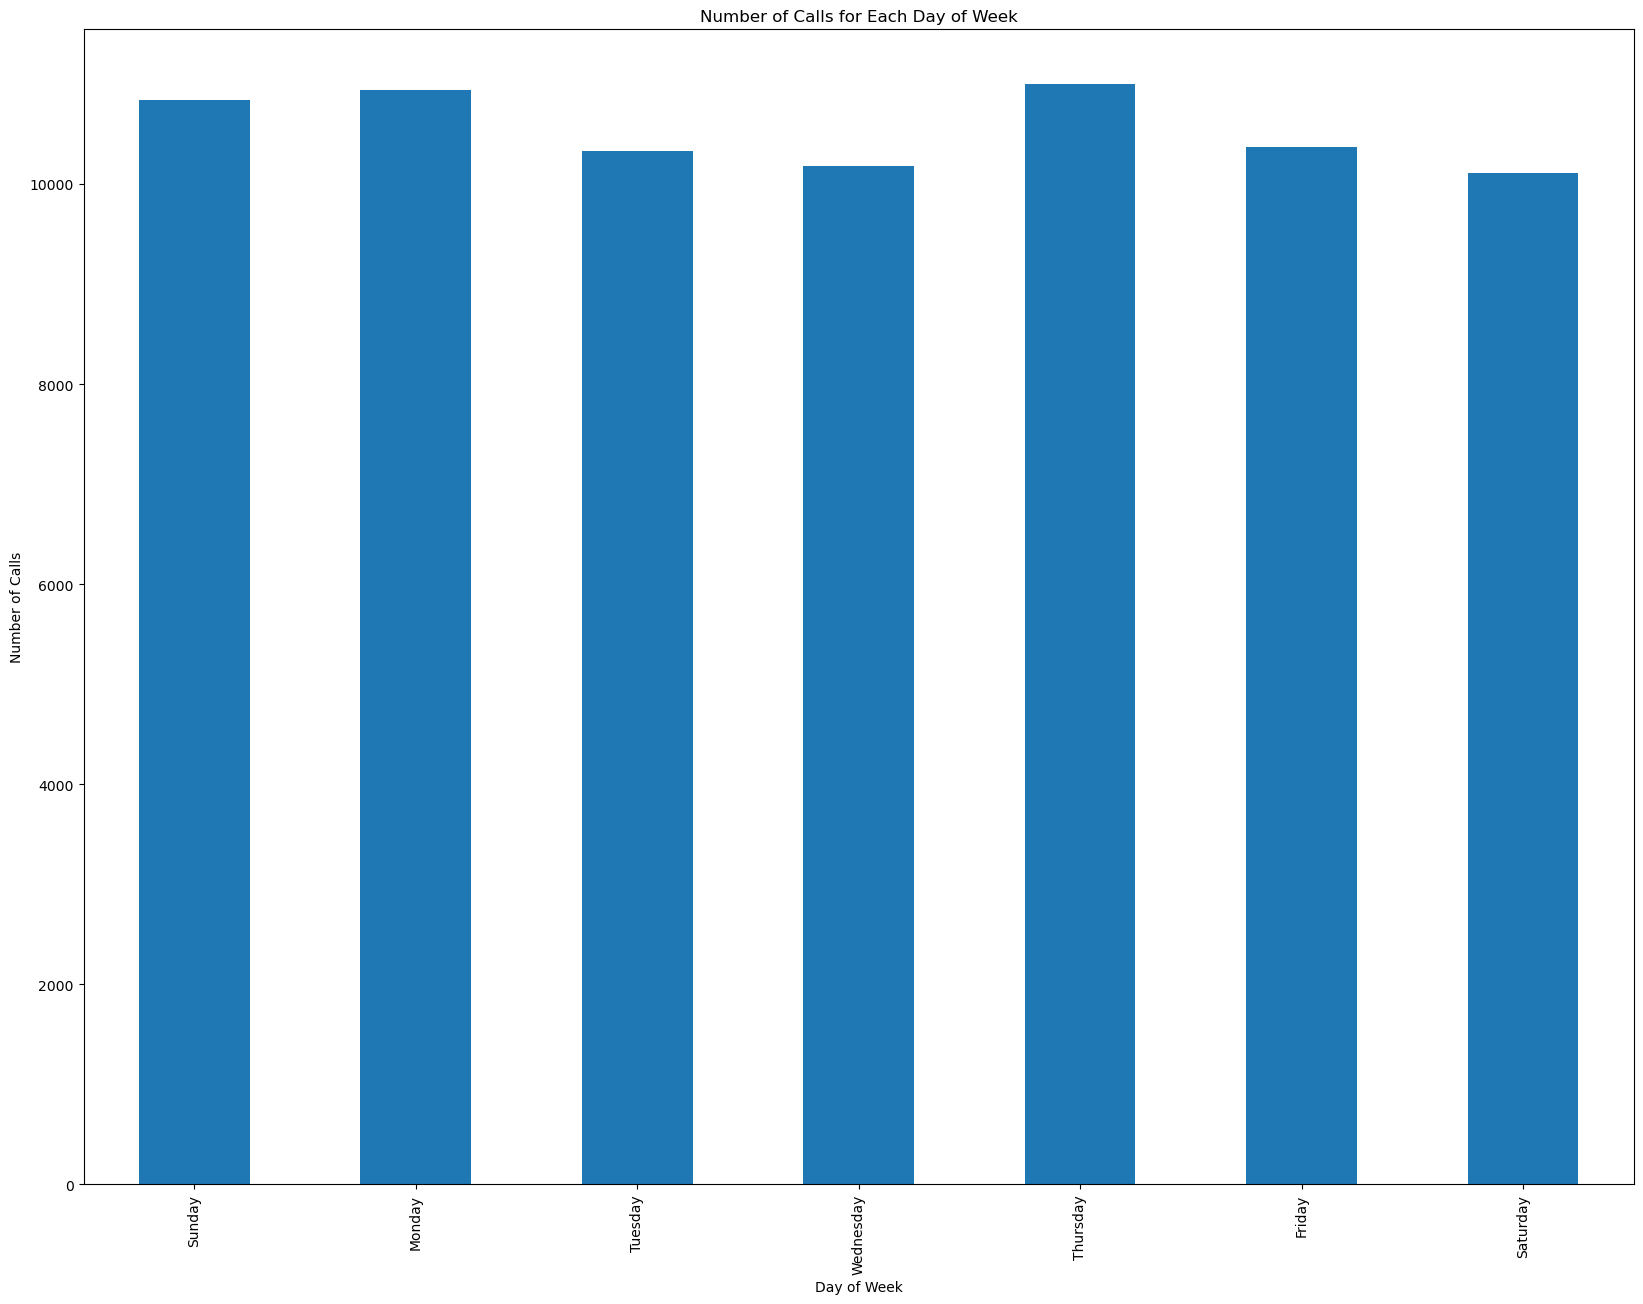

In [23]:
# YOUR CODE HERE

display = calls['DAY_OF_WEEK'].value_counts()[days].plot(kind = 'bar')

display.set_ylabel('Number of Calls')
display.set_xlabel('Day of Week')
display.set_title('Number of Calls for Each Day of Week')

#raise NotImplementedError()

### 3.5 What Day of the Week is more calls?

Is it true that weekdays generally have slightly more calls than Saturday or Sunday? What can you say about the difference?

In [24]:
##### START SOLUTION

#it is false that weekdays generally have slightly more calls than weekend days. Monday has the most, but no other weekday has more than the weekend. The calls decrease as the week goes on and increase on the weekend.

##### END_OF SOLUTION

We can break down into some particular types of events to see their distribution. For example, let's make a bar plot for the OFNS_DESC "HARRASSMENT 2". Which day is the peak for "HARRASSMENT 2"?

This time, use `seaborn` to create a vertical bar plot of the number of total noise violations reported on each day of the week, again ordered by the days of the week starting with Sunday. Do not use `pandas` to plot.

**Hint:** *If you're stuck, use the code for the seaborn plot in above question as a starting point.*

Text(0.5, 1.0, 'Number of HARRASSMENT 2 Calls for Each Day of Week')

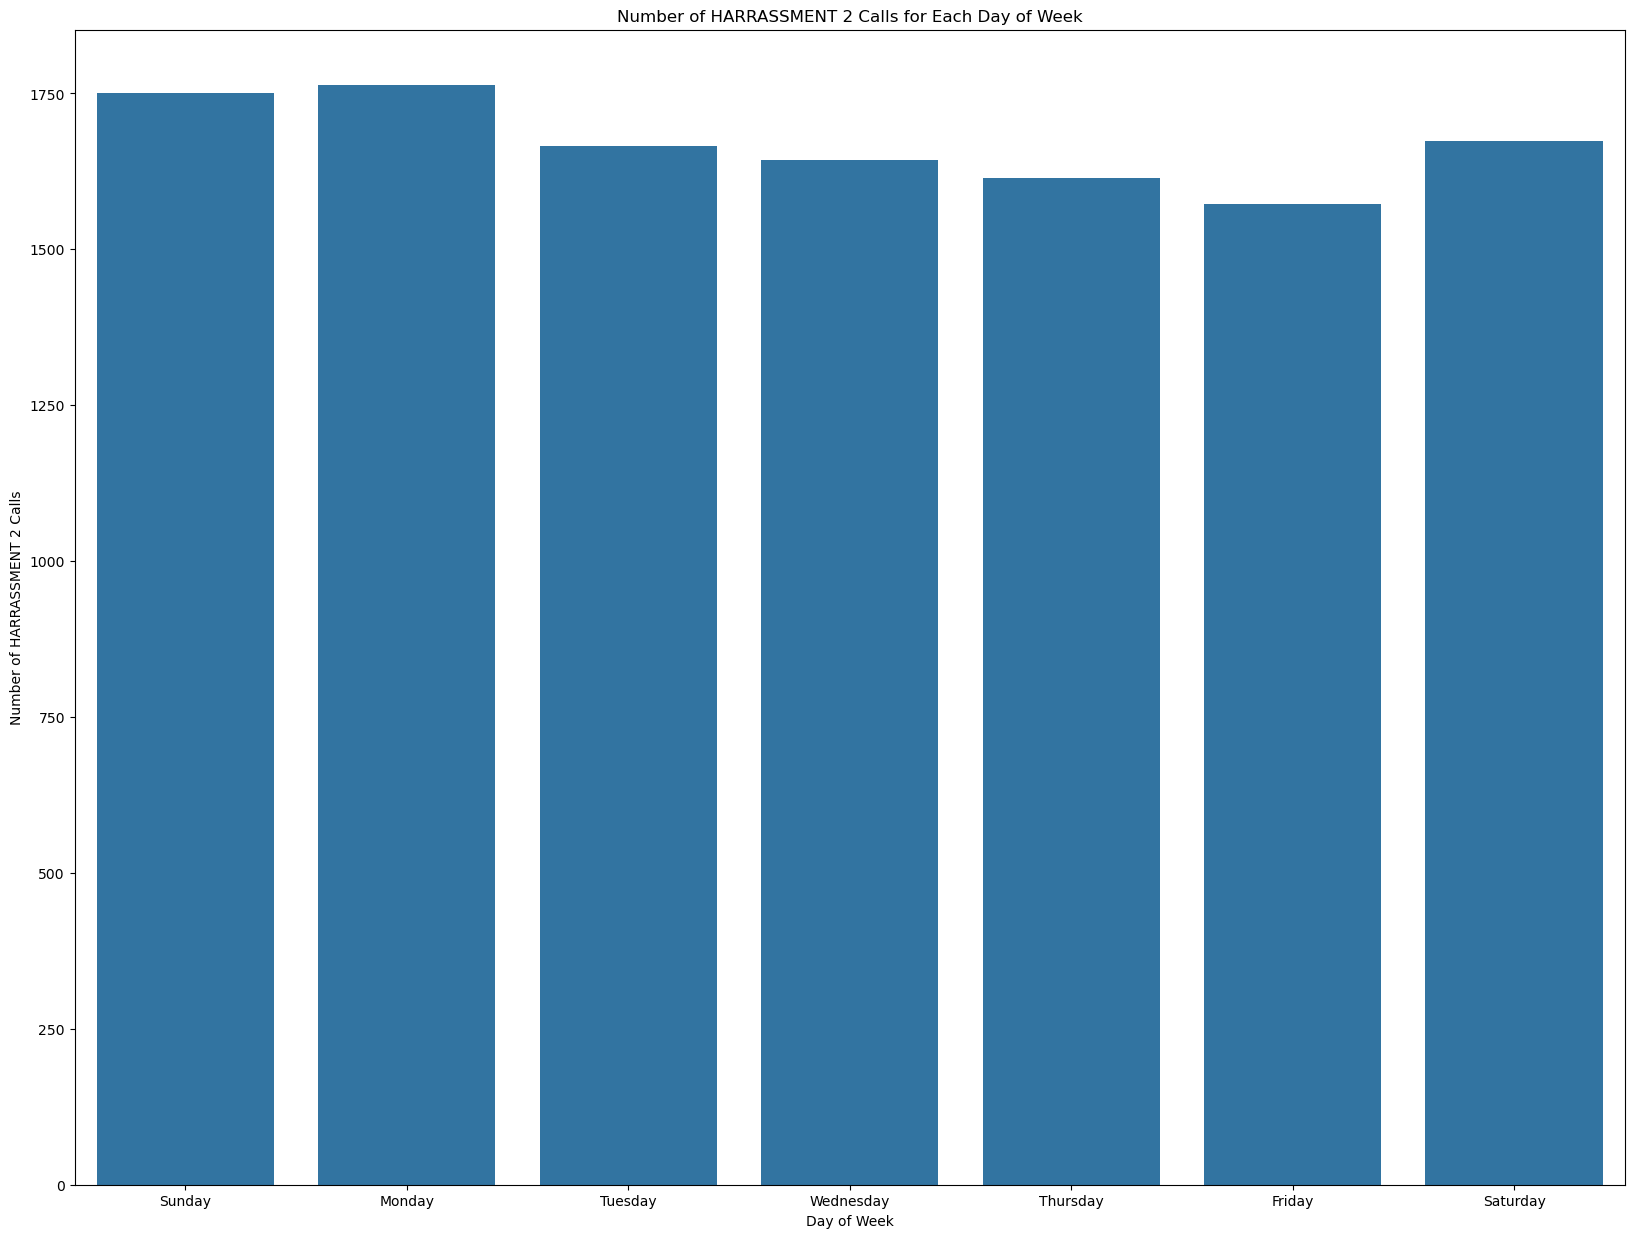

In [25]:
# YOUR CODE HERE

display = sns.countplot(data = calls[calls['OFNS_DESC'] == 'HARRASSMENT 2'], x = 'DAY_OF_WEEK', order = days)

display.set_ylabel('Number of HARRASSMENT 2 Calls')
display.set_xlabel('Day of Week')
display.set_title('Number of HARRASSMENT 2 Calls for Each Day of Week')

#raise NotImplementedError()

### 3.6 Distribution
Do you see anything interesting about the distribution of HARRASSMENT 2 calls over a week? Type a short answer below.

Dips during the week but rises during the weekend, with the exception of Monday which has the most.

### 3.7 More Plots

Let's look at a similar distribution but for a crime we have much more calls data about. In the cell below, create the same plot as you did in previous questions, but now looking at instances of the OFNS_DESC "BURGLARY" (instead of "HARRASSMENT 2"). Use either `pandas` or `seaborn` plotting as you desire.

Text(0.5, 1.0, 'Number of BURGLARY Calls for Each Day of Week')

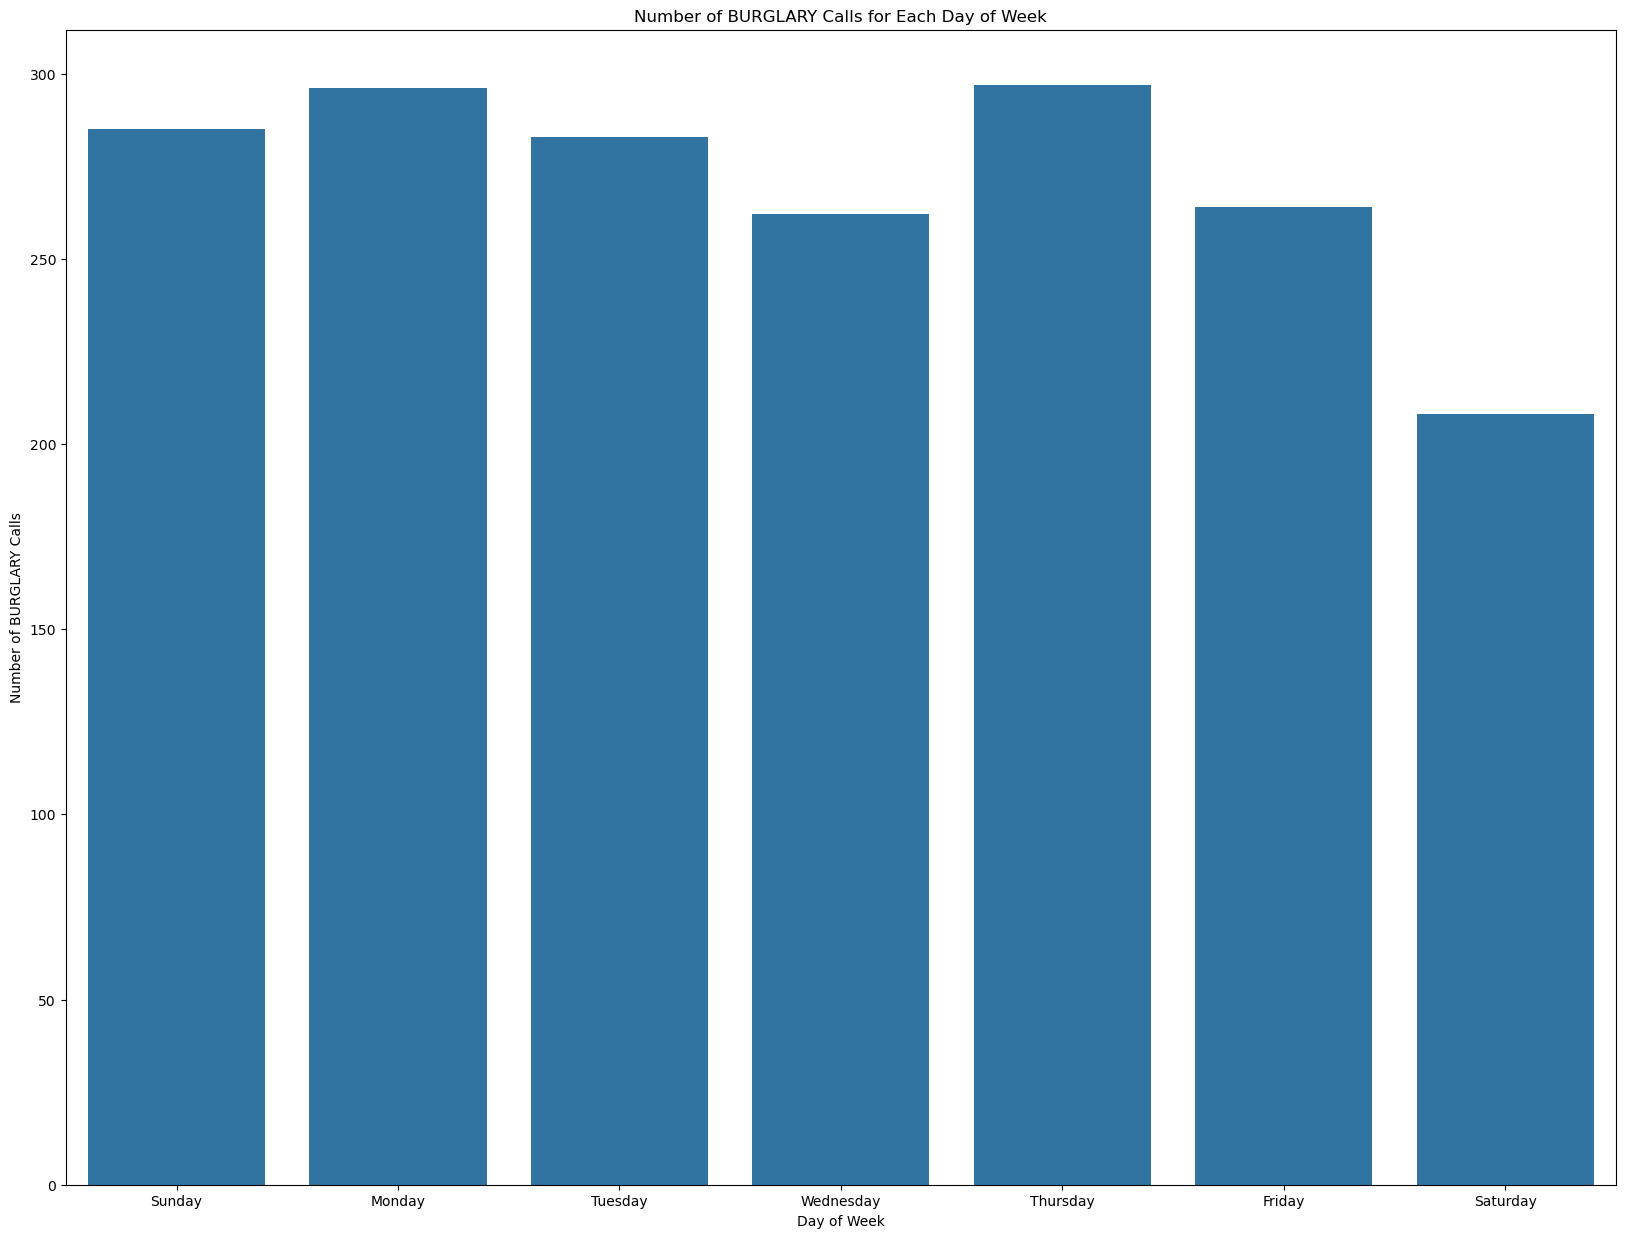

In [26]:
# YOUR CODE HERE

display = sns.countplot(data = calls[calls['OFNS_DESC'] == 'BURGLARY'], x = 'DAY_OF_WEEK', order = days)

display.set_ylabel('Number of BURGLARY Calls')
display.set_xlabel('Day of Week')
display.set_title('Number of BURGLARY Calls for Each Day of Week')

#raise NotImplementedError()

### 3.8 time of events

Now let's look at the CMPLNT_TO_TM column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`. Then plot the frequency of each hour in the table (i.e., `value_counts()`) sorted by the hour of the day (i.e., `sort_index()`).

You will want to look into how to use:

* [Series.str.slice](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.slice.html#pandas.Series.str.slice) to select the substring.
* [Series.astype](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) to change the type.

**Hint:** *The `str` helper member of a series can be used to grab substrings.  For example, `calls["CMPLNT_TO_TM"].str.slice(3,5)` returns the minute of each hour of the `CMPLNT_TO_TM`.*

Text(0.5, 1.0, 'Number of Calls For Each Day of the Week')

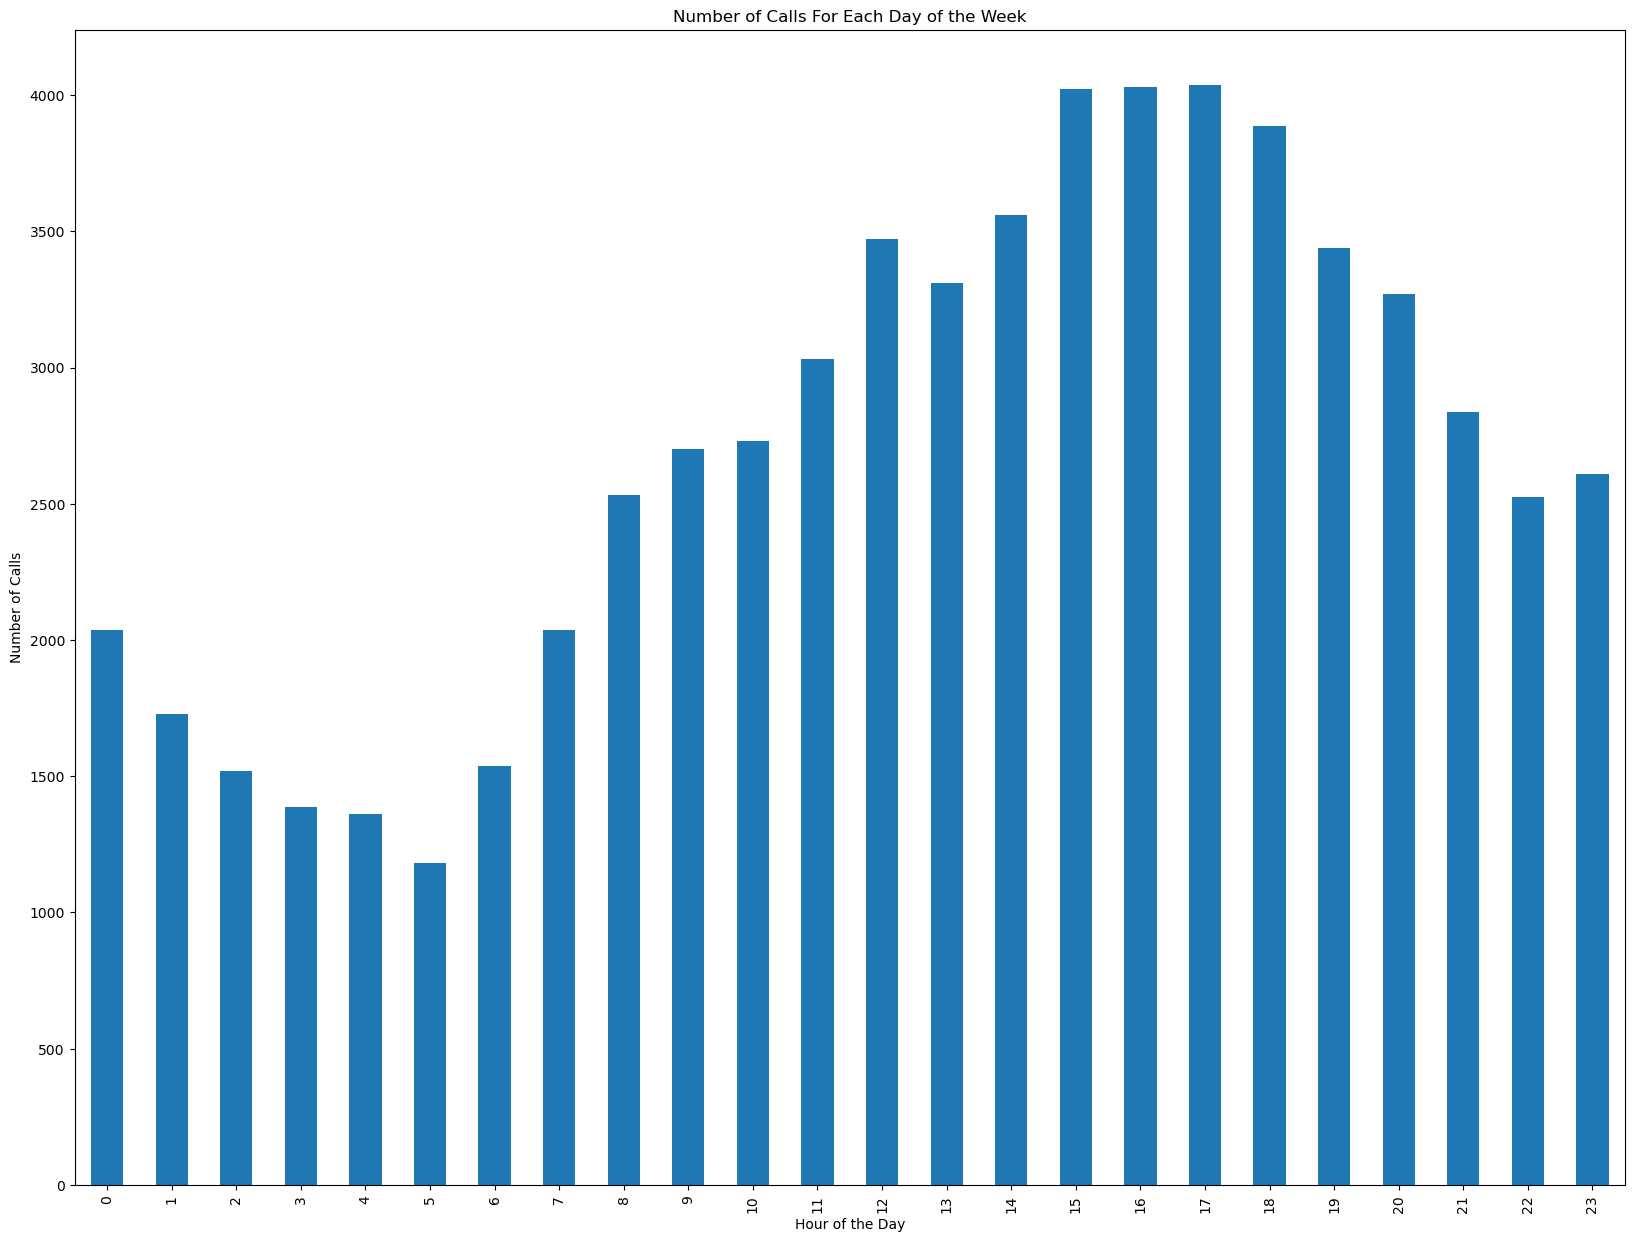

In [27]:
# YOUR CODE HERE

clean = calls['CMPLNT_TO_TM'].dropna()

calls['Hour'] = clean.str.slice(0, 2)
calls = calls.dropna(subset = ['Hour'])
calls['Hour'] = calls['Hour'].astype('int')
calls['OFNS_DESC'] = calls['OFNS_DESC'].astype(str)

display = calls['Hour'].value_counts().sort_index().plot(kind = 'bar')
display.set_xlabel("Hour of the Day")
display.set_ylabel("Number of Calls")
display.set_title("Number of Calls For Each Day of the Week")


#raise NotImplementedError()
#source: you.com

Create a pandas bar plot showing the number of BURGLARY crimes committed at each hour of the day. Use the labels
* ax.set_xlabel("Hour of the Day")
* ax.set_ylabel("Number of Calls")
* ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week");

Text(0.5, 1.0, 'Number of Calls Reporting Fraud For Each Day of the Week')

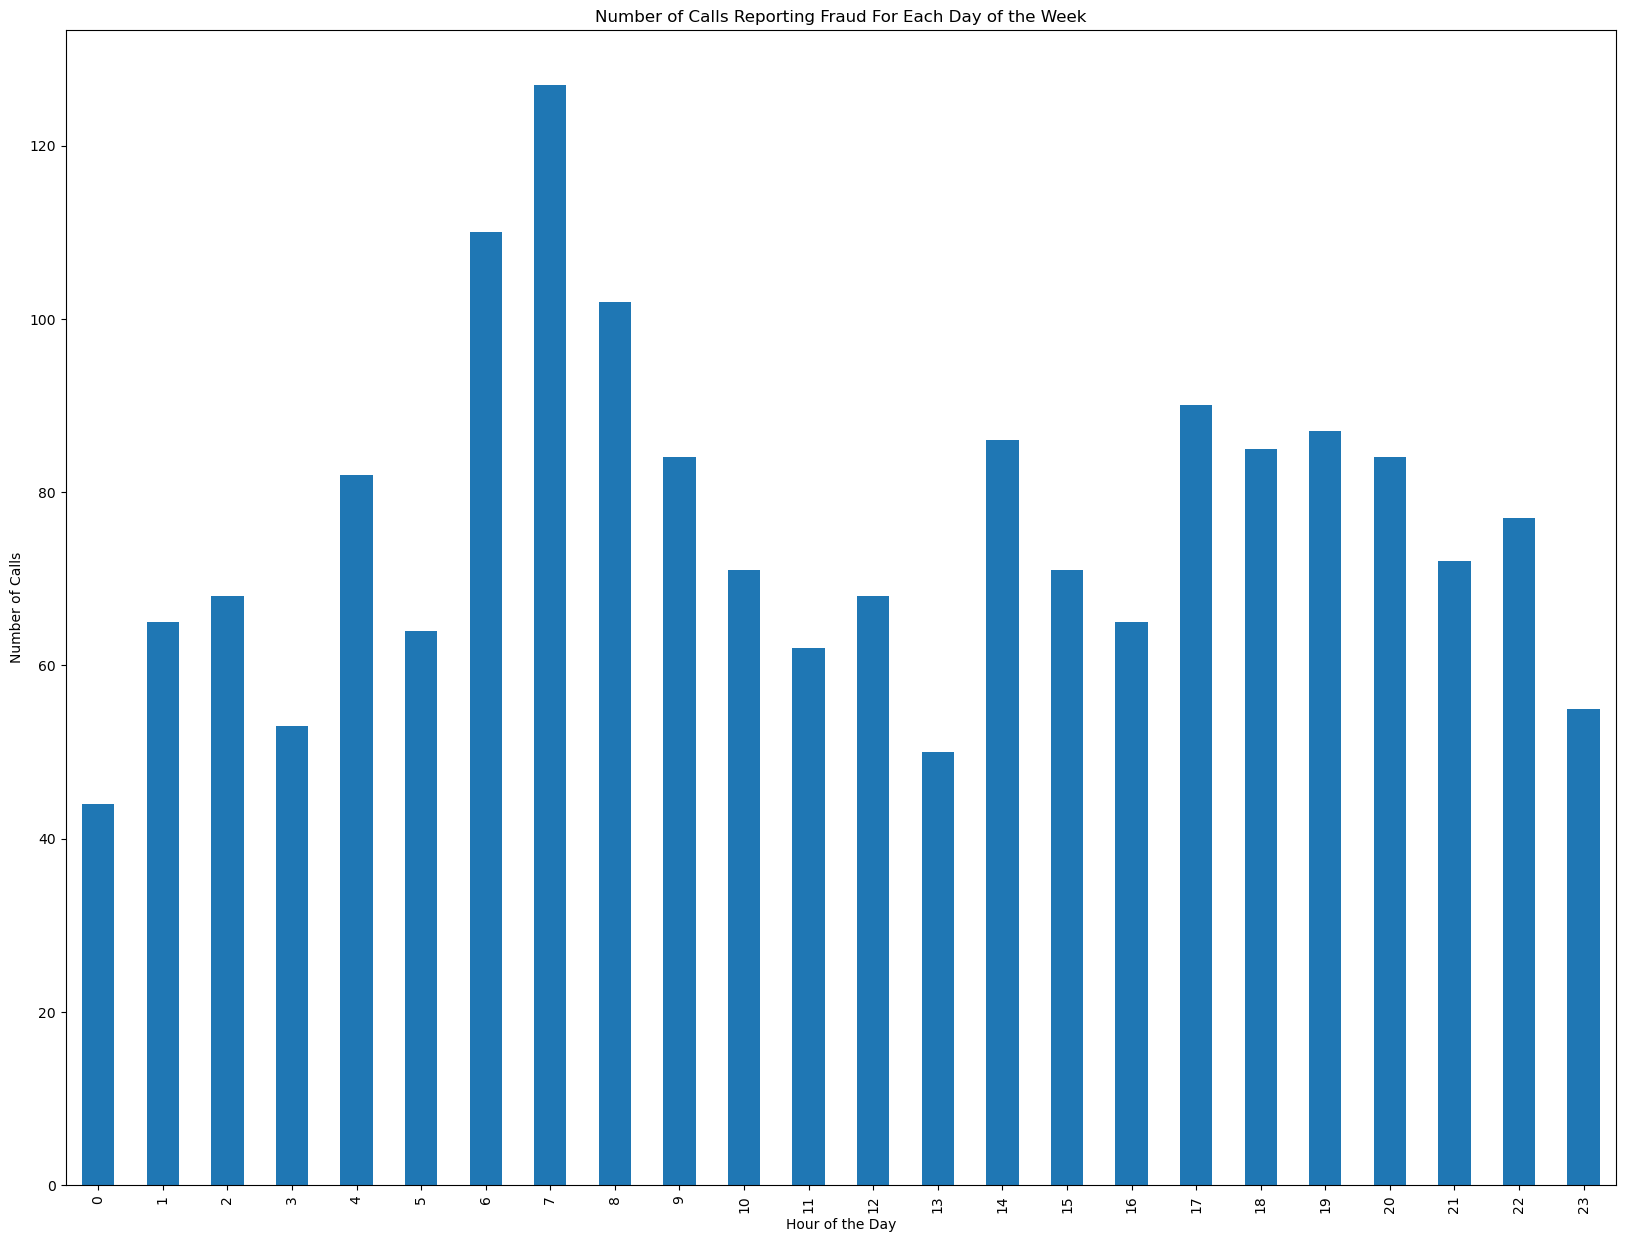

In [28]:
### START SOLUTION

ax = calls[calls['OFNS_DESC'] == 'BURGLARY']['Hour'].value_counts().sort_index().plot(kind = 'bar')

ax.set_xlabel("Hour of the Day")
ax.set_ylabel("Number of Calls")
ax.set_title("Number of Calls Reporting Fraud For Each Day of the Week")

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

### 3.9 More plots

In the cell below, create a seaborn plot of the same data. Again, make sure you provide axes labels and a title for your plot.

Text(0.5, 1.0, 'Number of Calls Reporting Fraud For Each Day of the Week')

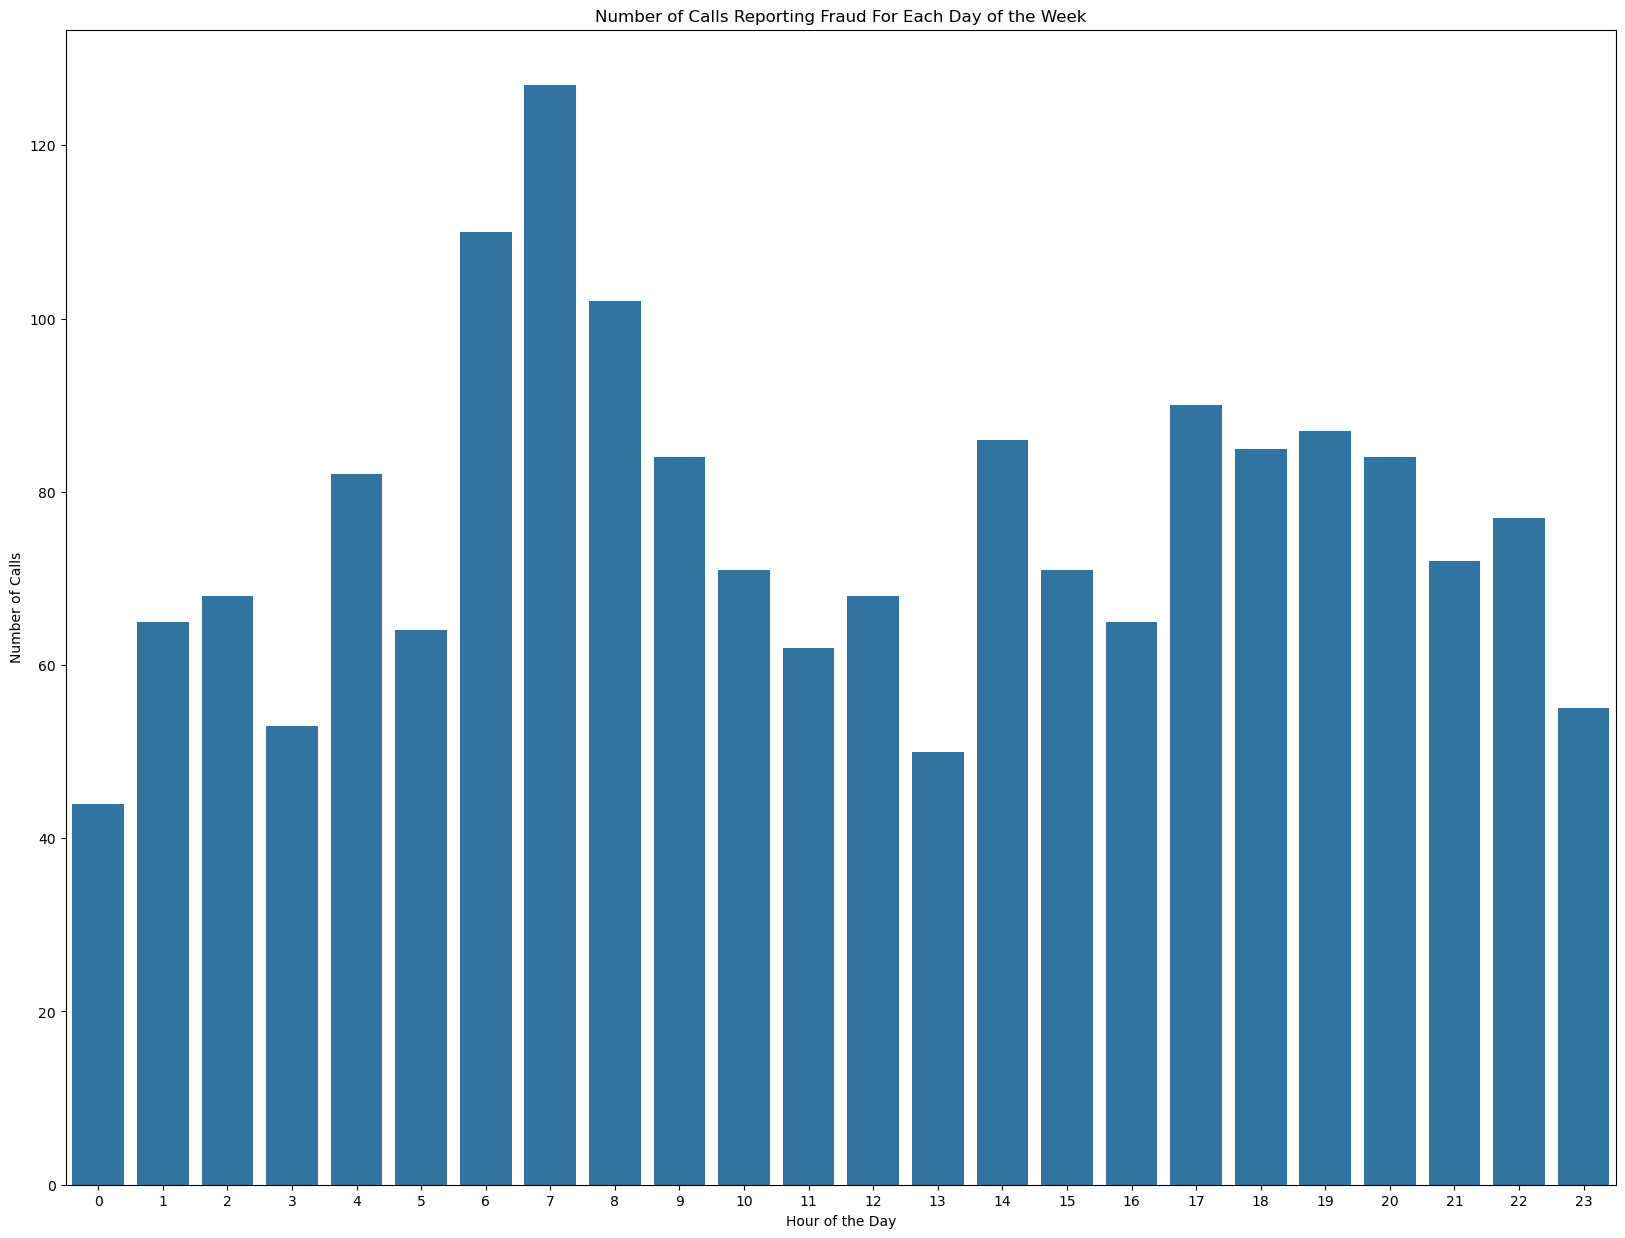

In [29]:
# YOUR CODE HERE

display = sns.countplot(x = 'Hour', data = calls[calls['OFNS_DESC'] == 'BURGLARY']['Hour'].to_frame())
display.set_xlabel("Hour of the Day")
display.set_ylabel("Number of Calls")
display.set_title("Number of Calls Reporting Fraud For Each Day of the Week")

#raise NotImplementedError()

### 3.10 Spike in burglary?

According to your plots, is there a spike in calls reporting BURGLARY at any particular time? If so, Do you trust that this spike is legitimate, or could there be an issue with our data? Explain your reasoning in 1-2 sentences below.

Yes, there is a spike around 7am. This might not be legitimate because this is only 1/10th of the entire data.

In the cell below, we generate a boxplot which examines the hour of day of each crime broken down by the `OFNS_DESC` value.  To construct this plot we used the [DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html) documentation.

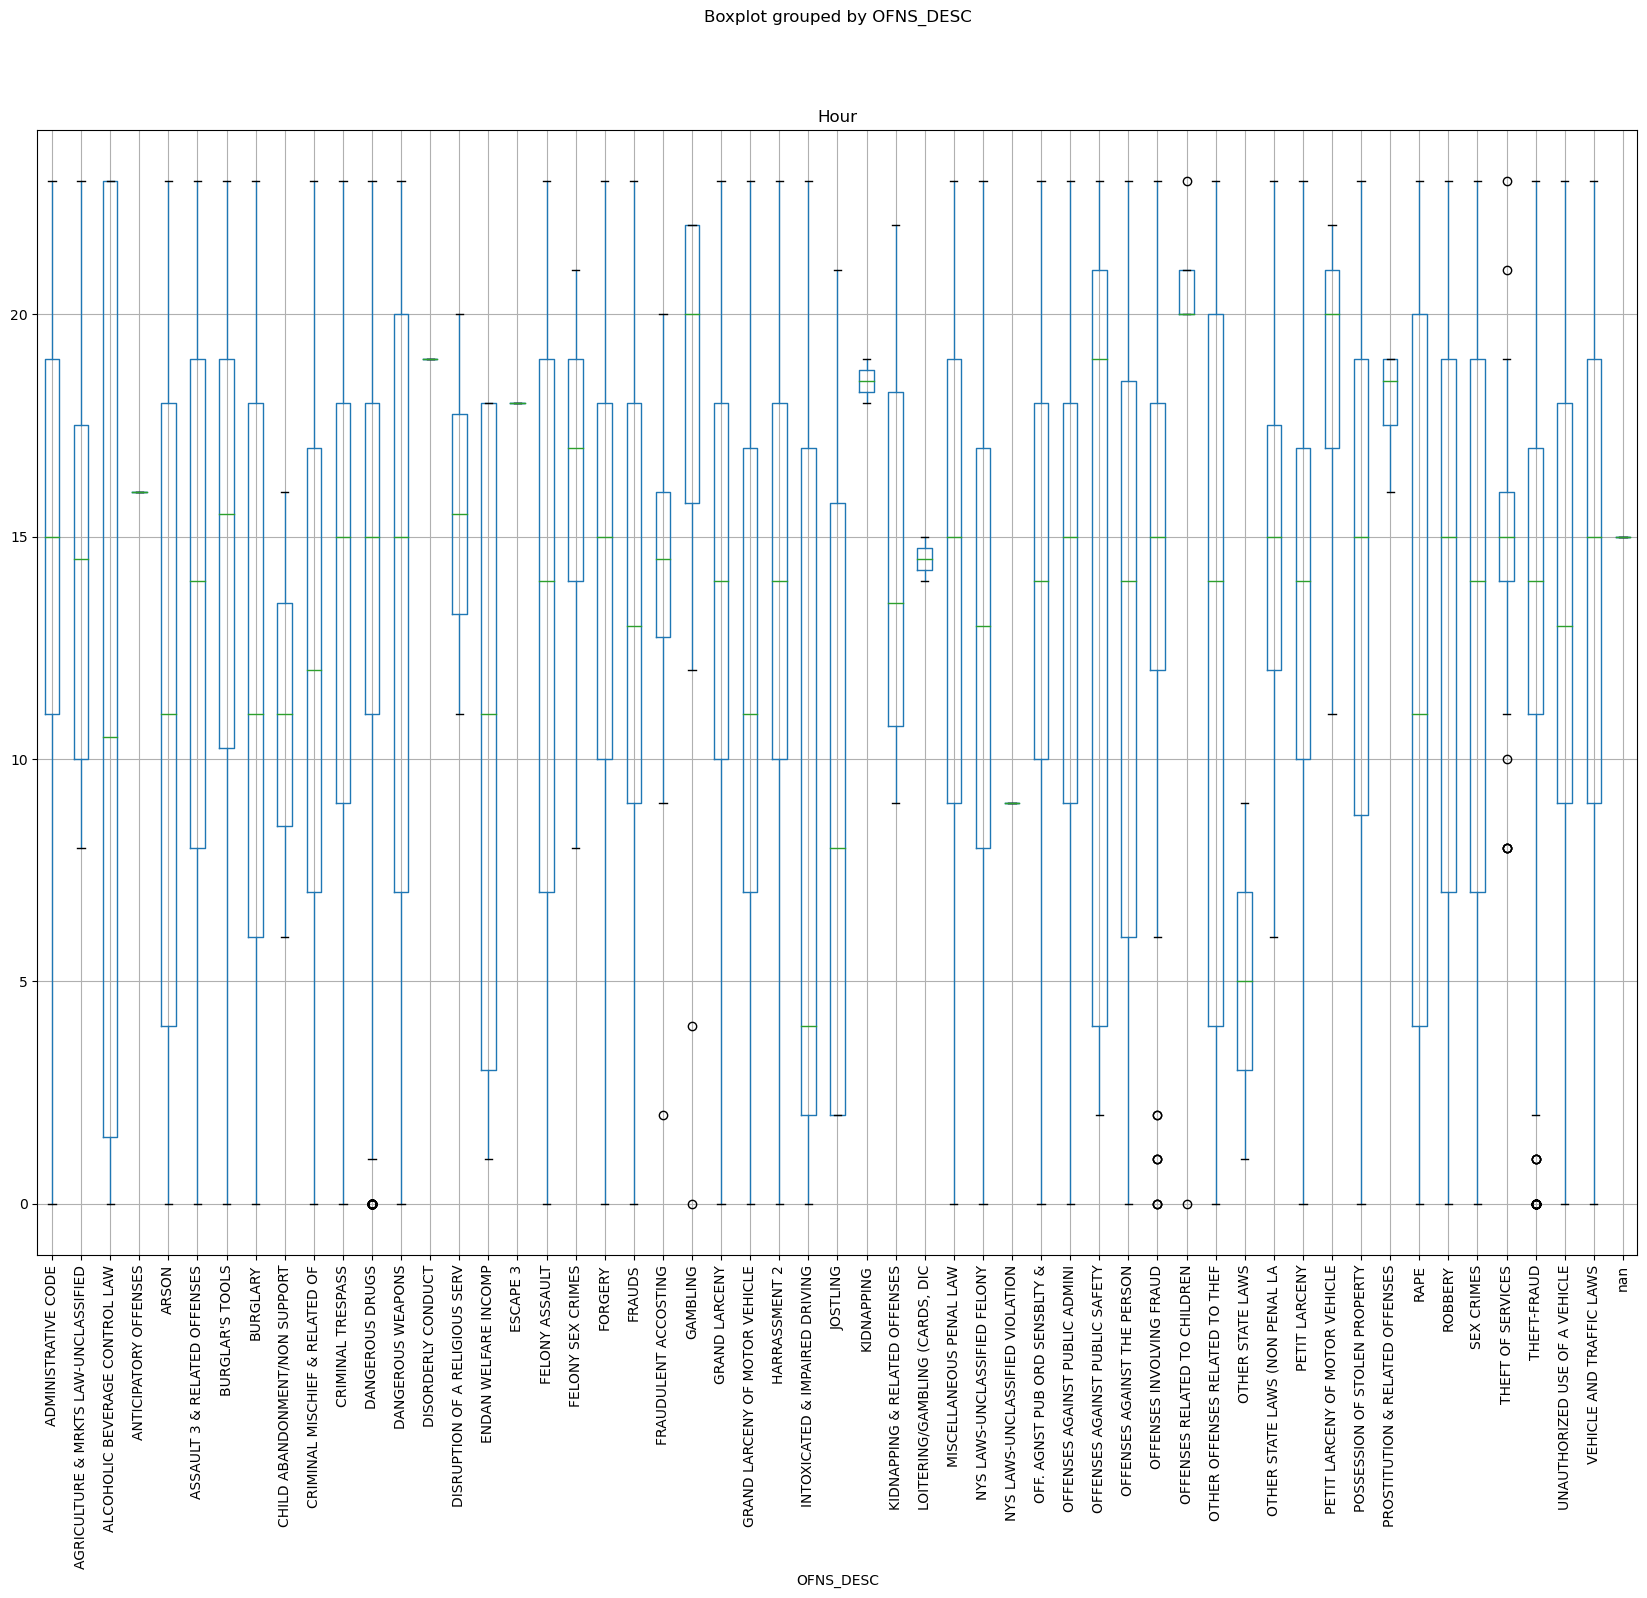

In [30]:
calls.boxplot(column="Hour", by='OFNS_DESC', rot=90);

While the pandas boxplot is informative, we can use seaborn to create a more visually-appealing plot. Using seaborn, regenerate a better box plot. See either the textbook (https://www.textbook.ds100.org/ch/06/viz_quantitative.html) or the [seaborn boxplot documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

Looking at your plot, which crime type appears to have the largest interquartile range? Put your results into `answer` as a string.

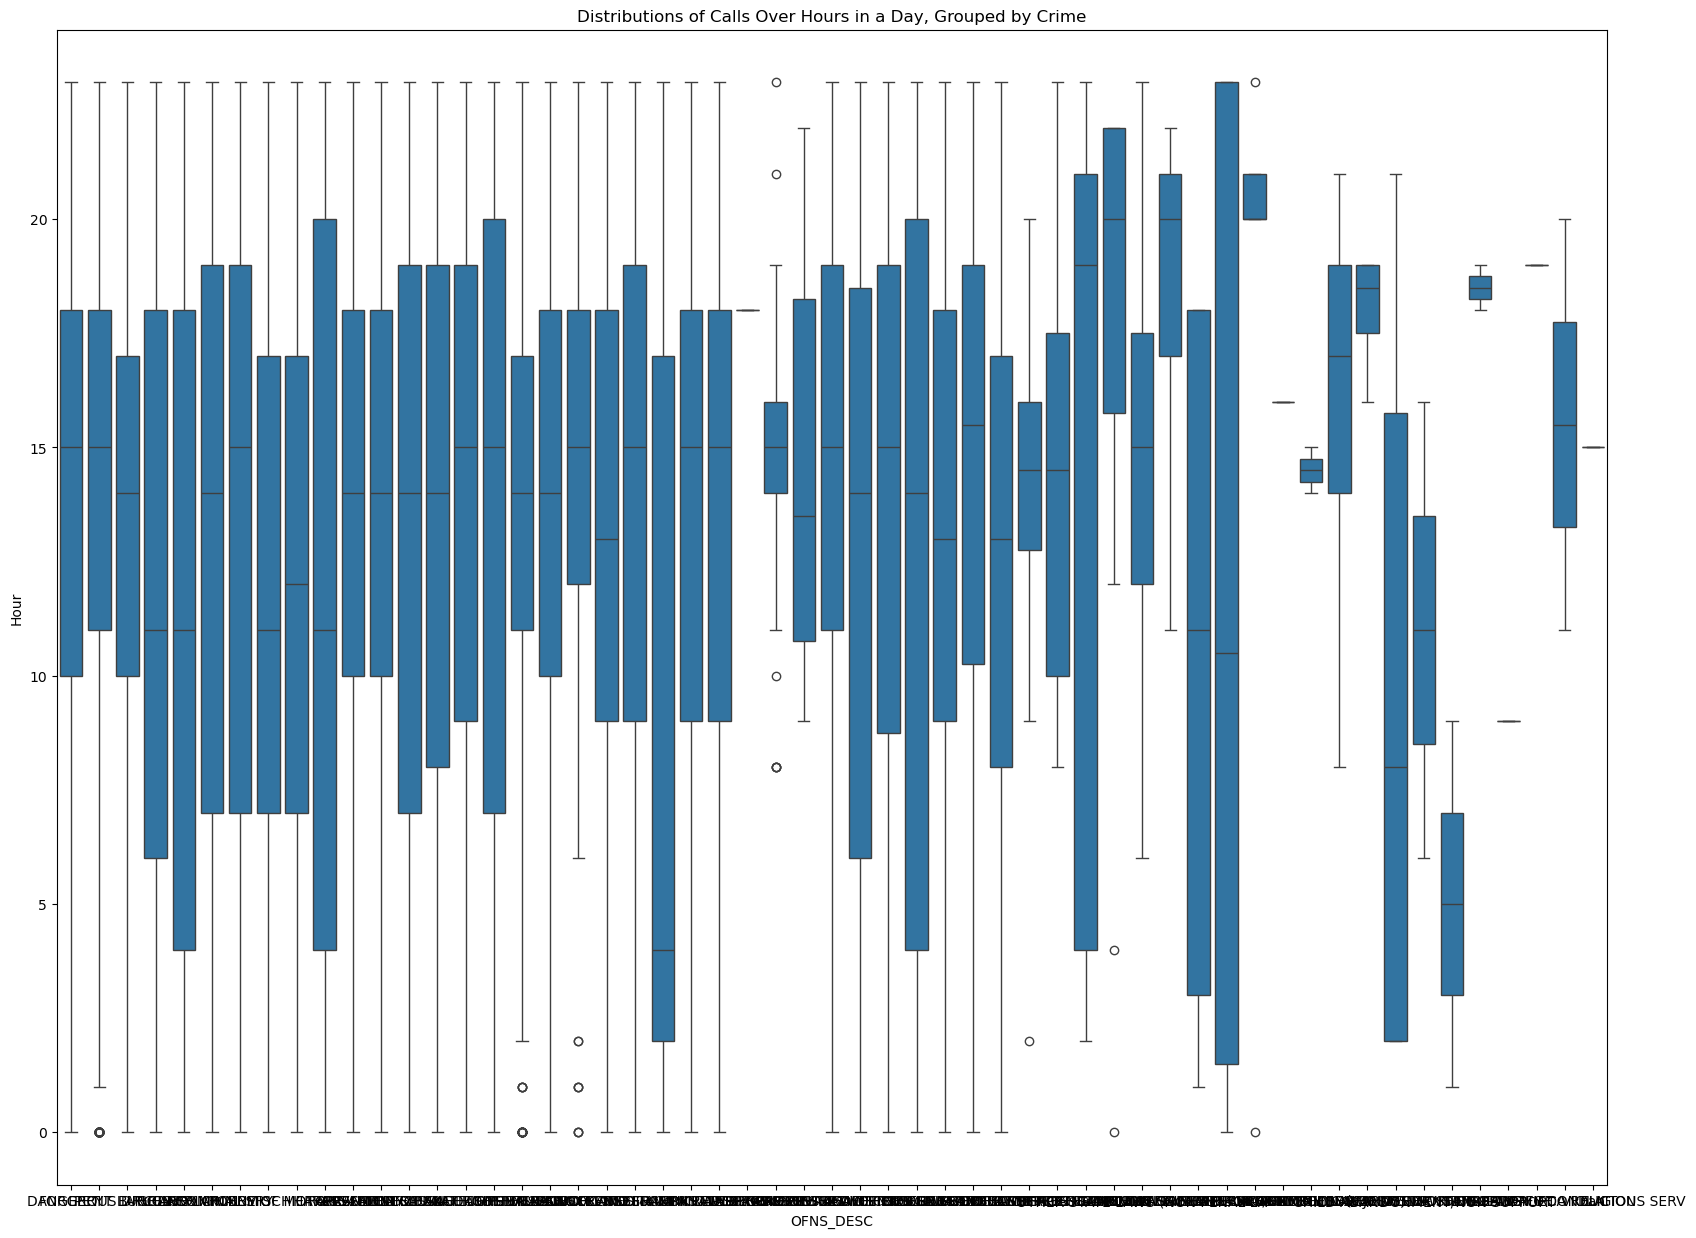

In [31]:
# YOUR CODE HERE

display = sns.boxplot(y = 'Hour', x = 'OFNS_DESC', data = calls)
display.set_title("Distributions of Calls Over Hours in a Day, Grouped by Crime");

answer = "ALCOHOLIC BEVERAGE CONTROL LAW"

#raise NotImplementedError()

### 3.11a Explore Suspect and Victim Age Relationships
In this activity we explore relations between SUSP_AGE_GROUP and VIC_AGE_GROUP
1. create a matrix of where rows are SUSP_AGE_GROUPS and Columns are VIC_AGE_GROUPs
2. Fill in the matrix with all probabilities (eg. "the probability that susp_age_group < 18 and victim_age_group <18). 
3. What age group is more likely to commit crimes? What age group is more likely to be a victim of a crime?

In [32]:
### START SOLUTION

display = pd.crosstab(calls['SUSP_AGE_GROUP'], calls['VIC_AGE_GROUP'])

commit = None
cmax = 0

for age_group in display.index:
    ctotal = display.loc[age_group].sum()
    
    if ctotal > cmax:
        commit = age_group
        cmax = ctotal

victim = None
vmax = 0

for age_group in display.columns:
    vtotal = display[age_group].sum()
    
    if vtotal > vmax:
        victim = age_group
        vmax = vtotal

print(display)
print(commit, "more likely to commit crimes")
print(victim, "more likely to be a victim of crimes")

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation
#source: you.com

VIC_AGE_GROUP   -954  -967  18-24  25-44  45-64   65+  <18  UNKNOWN
SUSP_AGE_GROUP                                                     
-965               0     0      0      0      1     0    0        0
18-24              0     0   1205   1314    663   111  324     1461
2019               0     0      0      0      0     1    0        0
25-44              0     1   1352   6586   2139   412  474     4523
45-64              0     0    281   1599   1519   221  160     1845
65+                0     0     29    124    148    75   24      122
<18                0     0    132    362    212    21  590      304
UNKNOWN            1     0   2013   8017   4386  1098  918     4448
UNKNOWN more likely to commit crimes
25-44 more likely to be a victim of crimes


### 3.11b Explore Suspect and Victim Sex Relationships
In this activity we explore relations between SUSP_SEX and VIC_SEX 
1. create a matrix of where rows are SUSP_SEX and Columns are VIC_SEX
2. Fill in the matrix with all probabilities (eg. "the probability that Males target other Males?")

In [33]:
### START SOLUTION

display = pd.crosstab(calls['SUSP_AGE_GROUP'], calls['VIC_AGE_GROUP'])
matrix = display / display.values.sum()
print(matrix)

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation
#source: you.com

VIC_AGE_GROUP      -954     -967     18-24     25-44     45-64       65+  \
SUSP_AGE_GROUP                                                             
-965            0.00000  0.00000  0.000000  0.000000  0.000020  0.000000   
18-24           0.00000  0.00000  0.024484  0.026699  0.013471  0.002255   
2019            0.00000  0.00000  0.000000  0.000000  0.000000  0.000020   
25-44           0.00000  0.00002  0.027471  0.133818  0.043461  0.008371   
45-64           0.00000  0.00000  0.005710  0.032489  0.030864  0.004490   
65+             0.00000  0.00000  0.000589  0.002520  0.003007  0.001524   
<18             0.00000  0.00000  0.002682  0.007355  0.004308  0.000427   
UNKNOWN         0.00002  0.00000  0.040901  0.162894  0.089117  0.022310   

VIC_AGE_GROUP        <18   UNKNOWN  
SUSP_AGE_GROUP                      
-965            0.000000  0.000000  
18-24           0.006583  0.029685  
2019            0.000000  0.000000  
25-44           0.009631  0.091901  
45-64           0

### 3.11c Observations 
Based on what was calculated in 3.11a and 3.11b, state at least two important observations.

1. the age group most likely to commit crimes is unknown

2. the matrix gives a holistic view of age and year

### 3.12 - Visualization of crimes on a Map of NYC
Finally we attempt to visualize the crimes committed in NYC on a Map. For this activity, use all data, not just the First set,  NYPD_Complaint_Data_Historic_1. 
First we need to install some mapping software. Run the cell below to install folium package for mapping software.

In [34]:
!/koko/system/anaconda/envs/python39/bin/pip install --user --upgrade folium

     |████████████████████████████████| 97 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 56 kB 2.1 MB/s  eta 0:00:01
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


In [35]:
buNYC = calls[calls["OFNS_DESC"] == "BURGLARY"][:20]
len(buNYC)
buNYC

,Unnamed: 0.1,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,DAY_OF_WEEK,Hour
16,16,16,183266811,12/20/2019,01:35:00,12/20/2019,01:44:00,66.0,12/20/2019,107,...,40.632545,-73.981951,"(40.63254475200006, -73.98195137599998)",PATROL BORO BKLYN SOUTH,NaN,65+,WHITE,F,Thursday,1
48,48,48,178126093,12/10/2019,15:00:00,12/10/2019,15:40:00,40.0,12/10/2019,107,...,40.819032,-73.918429,"(40.81903174100006, -73.91842930699994)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,Monday,15
103,103,103,452216611,11/22/2019,15:07:00,11/22/2019,15:15:00,40.0,11/22/2019,107,...,40.819535,-73.916203,"(40.81953517300008, -73.91620312499998)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,Thursday,15
148,148,148,603718234,11/05/2019,14:00:00,11/06/2019,08:00:00,121.0,11/06/2019,107,...,40.615652,-74.146224,"(40.61565229400002, -74.14622406399997)",PATROL BORO STATEN ISLAND,NaN,65+,WHITE,M,Monday,8
153,153,153,278157736,11/04/2019,18:00:00,11/04/2019,18:20:00,67.0,11/04/2019,107,...,40.642053,-73.930828,"(40.64205252200002, -73.93082848699999)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,M,Sunday,18
189,189,189,655691795,10/25/2019,20:50:00,10/25/2019,21:10:00,88.0,10/26/2019,107,...,40.688488,-73.976848,"(40.68848794500008, -73.97684840999993)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,D,Thursday,21
211,211,211,373228979,10/16/2019,12:45:00,10/16/2019,12:50:00,61.0,10/16/2019,107,...,40.593873,-73.940129,"(40.59387289000005, -73.94012864899997)",PATROL BORO BKLYN SOUTH,NaN,UNKNOWN,UNKNOWN,D,Tuesday,12
337,337,337,472438394,09/12/2019,00:30:00,09/12/2019,04:00:00,49.0,09/12/2019,107,...,40.860431,-73.853053,"(40.860431343000066, -73.85305266999995)",PATROL BORO BRONX,NaN,45-64,WHITE,M,Wednesday,4
377,377,377,355434365,08/29/2019,10:00:00,08/29/2019,13:12:00,14.0,08/29/2019,107,...,40.754162,-73.980395,"(40.75416245500002, -73.98039526899998)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,D,Wednesday,13
436,436,436,245714440,08/13/2019,18:00:00,08/13/2019,18:30:00,45.0,08/14/2019,107,...,40.842929,-73.848953,"(40.842928536000045, -73.84895306599998)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,D,Monday,18


In [36]:
### Plot the maps for BURGLARY in NYC. See notebooks for sample code.
### if it takes too much time or map does not show up, try plotting a subset of the data set of for a specific crime

import folium
import folium.plugins # The Folium Javascript Map Library
### START SOLUTION       

crimemap = folium.Map(location = [40.7128, -74.0060], zoom_start = 11) 

for row in buNYC.itertuples():
    folium.CircleMarker(location = [row.Latitude, row.Longitude],
            radius = 5,
            fill = True,
           fill_opacity = 0.1).add_to(crimemap)
crimemap

### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation
#source: you.com

# Part 4: Kernel Density Estimators (KDE) (5 pts)
When compared with the commonly used histogram, the kernel density estimator shows several advantages.
1. It is a smooth curve and thus it better exhibits the details of the probability density function.
2. It uses all sample points' locations, so, therefore, it better reveal the information contained in the sample.

In this activity, we will use KDE on CMPLNT_FR_DT data column from NYPD data set. Work with the column labled CMPLNT_FR_DT. The goal is to plot this one dimensional time data using KDE to see the distribution of time in a density map. You may have to convert time objects to seconds.

### 4.1 - Using Seaborn kdeplot, plot the KDE graph

In [37]:
### START SOLUTION


### END_OF SOLUTION
#raise NotImplementedError()  #comment after implementation

### 4.2 - What can you deduce from the KDE plot? Write your responses here

did not get the graph to work, but i assume there might be fluctuations incrementally during the day.

# (OPTIONAL - bonus - 5 pts) - Implement your own kernel function for KDE
Implement 3 Kernel functions from **scratch** from the following list.<br>
<img src='images/KDE.jpg' width="500" height="500"><br>
plot the KDE using your own code. Do not use kdeplot. Compare with Seaborn KDE plot. Do research to find out what kernel function that kdeplot is using and discuss advantages and disadvantages of each function compared to .

In [38]:
### START SOLUTION

def ked1(data):




def kde2(data):



def ked3(data):






    
    
### END_OF SOLUTION
raise NotImplementedError()  #comment after implementation

IndentationError: expected an indented block (1183486752.py, line 8)

<b> 4.3.1 </b> Call to Plot the 3 KDE's using your own code. Use CMPLNT_FR_DT as the data.

In [ ]:
### START SOLUTION







### END_OF SOLUTION
raise NotImplementedError()  #comment after implementation

Do your research to find what kernel function that kdeplot is using. Compare kdeplot density graph with your own.
### write your comments below

 ## Congratulations !!!

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> Output:</b> Please **remove all output** from your notebook prior to submission<br>
<b> File Name:</b> Please name the file as your_section_your_netID_Lab3.ipynb (eg. 01_adg133_Lab3.ipynb<br>
<b> Submit To: </b>CodeBench <br>
<b>Warning:</b> Failure to follow directions may result in loss of points.<br>
</div>

@2023 A.D. Gunawardena. Many people contributed to this lab including TA Liqin Long (now at Google). Credits go to Josh Hug, and Berkeley Data Science Group for their contributions to the original version. Please DO NOT share this lab and/or post them on public sites such as github and others.

### DO NOT post this lab on public or commercial sites. The lab is intended only for students taking CS439 in Fall 2023